#**ANALISIS DE DATOS**
--------------------------------------------------------
**Equipo 10**

***Antonio Torres Flores***

--------------------------------------------------------
#QUEJAS QUE REPORTA PROFECO DEL AÑO 2022

**PLANTEAMIENTO DEL PROBLEMA**

* Actualmente existe un organismo encargado de gestionar y dar solución a las quejas que las personas tienen sobre bienes y servicios que provee toda persona física o moral.

* Se hace análisis de estas quejas correspondientes al año 2022 de los distintos rúbros reportados.

* Se obtuvo el dataset de la página del gobierno 

         https://datos.profeco.gob.mx/datos_abiertos/

* El dataset se dividió en 2 (por tamaño) y se agrega la parte de quejas de telecomunicaciones, por lo que son 3 archivos que se concatenan en un df con el cual se trabaja.

**Se hace uso del dataset de la fase anterior, se presenta el código que se hizo para la limpieza del mismo en la celda de abajo**

In [16]:
#@title Limpieza de Datos fase anterior

import pandas as pd
import matplotlib.pyplot as plt

#Función para evitar error al hacer la importación de archivo
def convert_dtype(x):
    if not x:
        return ''
    try:
        return str(x)   
    except:        
        return ''

#hacer lista con los datos
archivos = [
      'https://raw.githubusercontent.com/atorresf/datasets/main/DATOS_PROFECO_2022_01.csv',
      'https://raw.githubusercontent.com/atorresf/datasets/main/DATOS_PROFECO_2022_02.csv',
      'https://raw.githubusercontent.com/atorresf/datasets/main/DATOS_TELECOMUN_2022.csv'
]

#cargar los datos en df
df1 = pd.read_csv(archivos[0], converters={'TIPO_RECLAMACION': convert_dtype,'MOTIVO_RECLAMACION': convert_dtype})
df2 = pd.read_csv(archivos[1], converters={'TIPO_RECLAMACION': convert_dtype,'MOTIVO_RECLAMACION': convert_dtype})
df3 = pd.read_csv(archivos[2], converters={'TIPO_RECLAMACION': convert_dtype,'MOTIVO_RECLAMACION': convert_dtype})

#homologar nombres de columnas en cada df
nuevos_nombres = { 
    'ID_EXP':'ID_EXP', 
    'FECHA_INGRESO':'FECHA_INGRESO', 
    'FECHA DE CIERRE':'FECHA_CIERRE', 
    'TIPO_CONCILIACION':'TIPO_CONCILIACION',
    'ESTADO_PROCESAL':'ESTADO_PROCESAL', 
    'PROVEEDOR':'PROVEEDOR', 
    'NOMBRE_COMERCIAL':'NOMBRE_COMERCIAL', 
    'GIRO':'GIRO', 
    'SECTOR':'SECTOR',
    'ODECO':'ODECO', 
    'ESTADO_UA':'ESTADO', 
    'TIPO_RECLAMACION':'TIPO_RECLAMACION', 
    'MOTIVO_RECLAMACION':'MOTIVO_RECLAMACION',
    'COSTO BIEN SERVICIO':'COSTO_BIEN_SERVICIO', 
    'MONTO RECLAMADO':'MONTO_RECLAMADO', 
    'MONTO RECUPERADO':'MONTO_RECUPERADO',
    'PROCEDIMIENTO':'PROCEDIMIENTO', 
    'BIEN O SERV':'BIEN_O_SERVICIO', 
    'MEDIO INGRESO':'MEDIO_INGRESO', 
    'TIPO PROD':'TIPO_PRODUCTO',
    'MODALIDAD COMPRA':'MODALIDAD_COMPRA',
    'MODALIDAD PAGO':'MODALIDAD_PAGO',
    'PROB ESPECIAL':'PROBLEMA_ESPECIAL', 
    'Unnamed: 23':'Unnamed_23',
    'Unnamed: 24':'Unnamed_24'
}

nuevos_nombres2 = { 
'EXPEDIENTE':'ID_EXP',
'FECHA DE INGRESO':'FECHA_INGRESO',
'FECHA DE CIERRE':'FECHA_CIERRE', 
'TIPO DE CONCILIACIÓN':'TIPO_CONCILIACION',
'ESTADO PROCESAL':'ESTADO_PROCESAL',
'PROVEEDOR':'PROVEEDOR', 
'NOMBRE COMERCIAL':'NOMBRE_COMERCIAL', 
'GIRO':'GIRO', 
'SECTOR':'SECTOR',
'ODECO':'ODECO',
'ESTADO':'ESTADO',
'TIPO DE RECLAMACIÓN':'TIPO_RECLAMACION', 
'MOTIVO DE RECLAMACIÓN':'MOTIVO_RECLAMACION',
'COSTO BIEN O SERVICIO':'COSTO_BIEN_SERVICIO', 
'MONTO RECLAMADO':'MONTO_RECLAMADO',
'MONTO RECUPERADO':'MONTO_RECUPERADO',
'PROCEDIMIENTO':'PROCEDIMIENTO',
'BIEN O SERVICIO':'BIEN_O_SERVICIO',
'MEDIO DE INGRESO':'MEDIO_INGRESO', 
'TIPO PRODUCTO':'TIPO_PRODUCTO',
'MODALIDAD DE COMPRA':'MODALIDAD_COMPRA',
'MODALIDAD PAGO':'MODALIDAD_PAGO',
'PROBLEMA ESPECIAL':'PROBLEMA_ESPECIAL'
}

df1.rename(columns=nuevos_nombres, inplace=True)
df2.rename(columns=nuevos_nombres, inplace=True)
df3.rename(columns=nuevos_nombres2, inplace=True)

#Concatenando los 3 archivos en un solo df
df = pd.concat([df1, df2, df3])

#Haciendo limpieza del df final, quitándo columnas que no necesitamos
df.drop(["Unnamed_23", "Unnamed_24",'ODECO','ID_EXP'], axis=1, inplace=True)

#quitando núlos y registros con carácteres raros
guiones = ['BIEN_O_SERVICIO','MODALIDAD_PAGO','TIPO_CONCILIACION','ESTADO_PROCESAL','GIRO','TIPO_RECLAMACION','PROCEDIMIENTO','MEDIO_INGRESO','TIPO_PRODUCTO','MONTO_RECUPERADO']
ceros = ['PROVEEDOR','NOMBRE_COMERCIAL','GIRO','TIPO_RECLAMACION']
ND = ['TIPO_CONCILIACION','ESTADO_PROCESAL']

for guion in guiones:
  df = df[df[guion] != '-']

for cero in ceros:
  df = df[df[guion] != '0']

for nd in ND:
  df = df[df[nd] != '#N/D']

vacios = ['ESTADO','BIEN_O_SERVICIO','MODALIDAD_PAGO','TIPO_RECLAMACION','MOTIVO_RECLAMACION','MEDIO_INGRESO','TIPO_PRODUCTO']

df = df.dropna(subset=vacios)

#df = df.reset_index()
#quitamos el caracter '$' y ',' de las columnas de costos

df["COSTO_BIEN_SERVICIO"] = df["COSTO_BIEN_SERVICIO"].str.replace("$", "", regex=False)
df["MONTO_RECLAMADO"] = df["MONTO_RECLAMADO"].str.replace("$", "", regex=False)
df["MONTO_RECUPERADO"] = df["MONTO_RECUPERADO"].str.replace("$", "", regex=False)

df["COSTO_BIEN_SERVICIO"] = df["COSTO_BIEN_SERVICIO"].str.replace(",", "", regex=False)
df["MONTO_RECLAMADO"] = df["MONTO_RECLAMADO"].str.replace(",", "", regex=False)
df["MONTO_RECUPERADO"] = df["MONTO_RECUPERADO"].str.replace(",", "", regex=False)

df["MONTO_RECUPERADO"] = df["MONTO_RECUPERADO"].str.replace("-", "0", regex=False)

#Convertir columnas a tipo de dato float y date

df["COSTO_BIEN_SERVICIO"] = df["COSTO_BIEN_SERVICIO"].astype(float)
df["MONTO_RECLAMADO"] = df["MONTO_RECLAMADO"].astype(float)
df["MONTO_RECUPERADO"] = df["MONTO_RECUPERADO"].astype(float)
df["FECHA_INGRESO"] = pd.to_datetime(df["FECHA_INGRESO"], dayfirst = True, errors = 'coerce')
df["FECHA_CIERRE"] = pd.to_datetime(df["FECHA_CIERRE"], dayfirst = True, errors = 'coerce')

#agragamos una columna llamada mes
df['MES_NUM'] = df['FECHA_INGRESO'].dt.month
mese = ["Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio", "Julio", "Agosto", "Septiembre", "Octubre", "Noviembre", "Diciembre"]
df['MES'] = df['MES_NUM'].map(lambda x: mese[x-1])

df_sinna = df.copy()
df_sinna = df_sinna.dropna()
df[['COSTO_BIEN_SERVICIO','MONTO_RECLAMADO','MONTO_RECUPERADO']] = df[['COSTO_BIEN_SERVICIO','MONTO_RECLAMADO','MONTO_RECUPERADO']].fillna(value=0)

df_no_zeros = df.copy()
df_no_zeros = df_no_zeros[df_no_zeros['MONTO_RECLAMADO'] > 0]
df_no_zeros = df_no_zeros[df_no_zeros['MONTO_RECUPERADO'] > 0]



**PREGUNTAS PARA EL ANÁLISIS DE LOS DATOS**

1. ¿Cuáles son los estados con más quejas?
2. ¿Cuál es el número de quejas por mes?
3. ¿Cuál es el sector más denunciado en promedio por entidad federativa?
4. ¿Cuál es el monto reclamado y recuperado por mes?
5. ¿Cuál es la cantidad de quejas resueltas? o ¿en que estatus están?
-----------------------------------------------------------------------

In [121]:
quejas_estado = df['ESTADO'].value_counts()
print(quejas_estado.head(10))

# agrupa las denuncias por entidad federativa
agrupado = df.groupby(['ESTADO']).count()
# obtiene el número de denuncias para cada entidad federativa
quejas = agrupado['TIPO_CONCILIACION'].tolist()


CIUDAD DE MÉXICO    28108
EDO. DE MÉXICO       7211
CHIHUAHUA            4225
VERACRUZ             3651
GUANAJUATO           3555
JALISCO              3132
QUERÉTARO            2357
YUCATÁN              2087
AGUASCALIENTES       1856
COAHUILA             1726
Name: ESTADO, dtype: int64


2. Número de quejas por mes

In [122]:
# agrupa las denuncias por entidad federativa
agrupado_x_mes = df.groupby(['MES']).count()
# obtiene el número de denuncias para cada entidad federativa
quejas_x_mes = agrupado_x_mes['TIPO_CONCILIACION'].tolist()


In [5]:
agrupado_x_mes

,index,FECHA_INGRESO,FECHA_CIERRE,TIPO_CONCILIACION,ESTADO_PROCESAL,PROVEEDOR,NOMBRE_COMERCIAL,GIRO,SECTOR,ESTADO,...,MONTO_RECLAMADO,MONTO_RECUPERADO,PROCEDIMIENTO,BIEN_O_SERVICIO,MEDIO_INGRESO,TIPO_PRODUCTO,MODALIDAD_COMPRA,MODALIDAD_PAGO,PROBLEMA_ESPECIAL,MES_NUM
MES,,,,,,,,,,,,,,,,,,,,,
Abril,6820,6820,5215,6820,6820,6820,6820,6820,6820,6820,...,6820,6820,6820,6820,6820,6820,6820,6820,6820,6820
Agosto,7555,7555,4121,7555,7555,7555,7555,7555,7555,7555,...,7555,7555,7555,7555,7555,7555,7555,7555,7555,7555
Diciembre,3984,3984,143,3984,3984,3984,3984,3984,3984,3984,...,3984,3984,3984,3984,3984,3984,3984,3984,3984,3984
Enero,6689,6689,5818,6689,6689,6689,6689,6689,6689,6689,...,6689,6689,6689,6689,6689,6689,6689,6689,6689,6689
Febrero,6714,6714,5501,6714,6714,6714,6714,6714,6714,6714,...,6714,6714,6714,6714,6714,6714,6714,6714,6714,6714
Julio,7021,7021,4425,7021,7021,7021,7021,7021,7021,7021,...,7021,7021,7021,7021,7021,7021,7021,7021,7021,7021
Junio,7831,7831,5186,7831,7831,7831,7831,7831,7831,7831,...,7831,7831,7831,7831,7831,7831,7831,7831,7831,7831
Marzo,8038,8038,6298,8038,8038,8038,8038,8038,8038,8038,...,8038,8038,8038,8038,8038,8038,8038,8038,8038,8038
Mayo,7718,7718,5889,7718,7718,7718,7718,7718,7718,7718,...,7718,7718,7718,7718,7718,7718,7718,7718,7718,7718


In [123]:
meses = {
    'January': 'Enero', 'February': 'Febrero', 'March': 'Marzo', 'April':'Abril', 'May':'Mayo','June':'Junio', 
    'July':'Julio','August':'Agosto','September':'Septiembre','October':'Octubre','November':'Noviembre','December':'Diciembre'
}
quejas_mes = df['FECHA_INGRESO'].dt.strftime('%B').map(meses).value_counts()
print(quejas_mes.head(12))


Marzo         8038
Junio         7831
Mayo          7718
Agosto        7555
Julio         7021
Noviembre     6871
Octubre       6869
Abril         6820
Febrero       6714
Enero         6689
Septiembre    6680
Diciembre     3984
Name: FECHA_INGRESO, dtype: int64


3. ¿Cuál es el sector más denunciado en promedio por entidad federativa?

In [5]:
sectores_denunciados_por_entidad = df.groupby(["ESTADO", "SECTOR"]).size().reset_index(name="denuncias")
df.groupby(["ESTADO", "SECTOR"]).size().reset_index(name="denuncias")
sectores_promedio_por_entidad = sectores_denunciados_por_entidad.groupby("ESTADO").mean().reset_index()
sectores_denunciados_por_entidad.groupby("ESTADO").mean().reset_index()
entidad_con_sector_promedio_mas_alto = sectores_promedio_por_entidad.loc[sectores_promedio_por_entidad["denuncias"].idxmax()]["ESTADO"]
sectores_promedio_por_entidad.loc[sectores_promedio_por_entidad["denuncias"].idxmax()]["ESTADO"]
sector_promedio_mas_alto_por_entidad = df[df["ESTADO"] == entidad_con_sector_promedio_mas_alto]["SECTOR"].value_counts().index[0]
df[df["ESTADO"] == entidad_con_sector_promedio_mas_alto]["SECTOR"].value_counts().index[0]
prom_alto=sectores_promedio_por_entidad.loc[sectores_promedio_por_entidad["ESTADO"] == entidad_con_sector_promedio_mas_alto]["denuncias"].values[0]
print(f"El sector más denunciado en promedio por entidad federativa es {sector_promedio_mas_alto_por_entidad} en la entidad {entidad_con_sector_promedio_mas_alto} con un promedio de {prom_alto} denuncias por sector.")



El sector más denunciado en promedio por entidad federativa es TURÍSTICO en la entidad CIUDAD DE MÉXICO con un promedio de 136.44660194174756 denuncias por sector.


4. ¿Cuál es el monto reclamado y recuperado por mes?

In [6]:
agrupado_monto = df.groupby(['MES_NUM']).sum()
agrupado_monto.rename(index={1: "Enero", 2: "Febrero", 3: "Marzo", 4:"Abril", 5:"Mayo", 6:"Junio", 7:"Julio", 8:"Agosto", 9:"Septiembre", 10:"Octubre", 11:"Noviembre", 12:"Diciembre"}, inplace=True)
agrupado_monto[['MONTO_RECLAMADO','MONTO_RECUPERADO']]

,MONTO_RECLAMADO,MONTO_RECUPERADO
MES_NUM,,
Enero,52889798.08,49689316.22
Febrero,42011460.41,38600194.24
Marzo,60060063.39,54736182.87
Abril,42282252.48,46084089.83
Mayo,50340368.11,53248866.14
Junio,40894354.58,44760585.47
Julio,22072913.81,25172571.89
Agosto,17125434.81,19405924.26
Septiembre,2352127.88,3149237.51


5. Cantidad de quejas resueltas o en que estatus están

In [7]:
quejas_status = df['ESTADO_PROCESAL'].value_counts()
print(quejas_status)

En Trámite                       34937
Conciliada                       24811
Desistimiento                    15911
No Conciliada                     6695
Improcedente                       426
Turnada a Concil Medios Elec.        9
Turnada a Concil Person p/seg        1
Name: ESTADO_PROCESAL, dtype: int64


# **1. Estimados de Locación y Variabilidad** (Postwork 1)

**DESARROLLO**

1. Identifica las columnas de tu dataset que tengan datos numéricos.
***NOTA. Dado que existen muchos valores con cero en las columnas MONTO_RECLAMADO y MONTO_RECUPERADO se tiene el df_no_zeros donde se omiten estos valores***
   * COSTO_BIEN_SERVICIO
   * MONTO_RECLAMADO
   * MONTO_RECUPERADO

2. Identifica la relevancia de esas columnas (qué tan importantes son para responder a tus preguntas).

   * Son columnas muy importantes pues nos da una visión clara sobre PROFECO si realmente está trabajando para recuperar lo perdido por los consumidores y que tanto es lo que se recupera.

3. Obtén los siguientes estimados de tus columnas numéricas:
       a) Promedio 
       b) Mediana 
       c) Media Truncada 
       d) Desviación estándar 
       e) Rango 
       f) Percentiles 25 y 75 (por lo menos) 
       g) Rango intercuartil


In [8]:
round(df.describe(),2)

,COSTO_BIEN_SERVICIO,MONTO_RECLAMADO,MONTO_RECUPERADO,MES_NUM
count,82790.00,82790.00,82790.00,82790.00
mean,81189.97,3994.36,4060.26,6.27
std,337181.05,49944.50,48429.51,3.29
min,0.00,0.00,0.00,1.00
25%,1717.10,0.00,0.00,3.00
50%,8515.57,0.00,0.00,6.00
75%,30408.50,0.00,0.00,9.00
max,20000000.00,8247000.00,5047500.00,12.00


In [9]:
from scipy import stats

datos = [[round(df["COSTO_BIEN_SERVICIO"].mean(),2),round(df["MONTO_RECLAMADO"].mean(),2),round(df["MONTO_RECUPERADO"].mean(),2)],
         [round(df["COSTO_BIEN_SERVICIO"].median(),2),round(df["MONTO_RECLAMADO"].median(),2),round(df["MONTO_RECUPERADO"].median(),2)],
         [round(stats.trim_mean(df['COSTO_BIEN_SERVICIO'], 0.05),2), round(stats.trim_mean(df['MONTO_RECLAMADO'], 0.05),2), round(stats.trim_mean(df['MONTO_RECUPERADO'], 0.05),2)],
         [round(df['COSTO_BIEN_SERVICIO'].max() - df['COSTO_BIEN_SERVICIO'].min(),2), round(df['MONTO_RECLAMADO'].max() - df['MONTO_RECLAMADO'].min(),2), round(df['MONTO_RECUPERADO'].max() - df['MONTO_RECUPERADO'].min(),2)],
         [round(df['COSTO_BIEN_SERVICIO'].quantile(0.25),2), round(df['MONTO_RECLAMADO'].quantile(0.25),2), round(df['MONTO_RECUPERADO'].quantile(0.25),2)],
         [round(df['COSTO_BIEN_SERVICIO'].quantile(0.75),2), round(df['MONTO_RECLAMADO'].quantile(0.75),2), round(df['MONTO_RECUPERADO'].quantile(0.75),2)],
         [round(df['COSTO_BIEN_SERVICIO'].quantile(0.75) - df['COSTO_BIEN_SERVICIO'].quantile(0.25),2),round(df['MONTO_RECLAMADO'].quantile(0.75) - df['MONTO_RECLAMADO'].quantile(0.25),2),round(df['MONTO_RECUPERADO'].quantile(0.75) - df['MONTO_RECUPERADO'].quantile(0.25),2)]
        ]

columnas = ["COSTO_BIEN_SERVICIO", "MONTO_RECLAMADO", "MONTO_RECUPERADO"]
filas = ["Media", "Mediana", "Media truncada", "Rango", "Percentil 25", "Percentil 75","IQR"]

est = pd.DataFrame(datos,columns = columnas, index = filas)
print(est)




                COSTO_BIEN_SERVICIO  MONTO_RECLAMADO  MONTO_RECUPERADO
Media                      81189.97          3994.36           4060.26
Mediana                     8515.57             0.00              0.00
Media truncada             32127.92           432.16            429.03
Rango                   20000000.00       8247000.00        5047500.00
Percentil 25                1717.10             0.00              0.00
Percentil 75               30408.50             0.00              0.00
IQR                        28691.40             0.00              0.00


In [124]:
round(df_no_zeros.describe(),2)

,COSTO_BIEN_SERVICIO,MONTO_RECLAMADO,MONTO_RECUPERADO,MES_NUM
count,14308.00,14308.00,14308.00,14308.00
mean,50578.32,16822.13,23493.78,4.43
std,220202.58,87073.92,114522.55,2.56
min,0.00,0.00,0.10,1.00
25%,1000.00,0.00,1200.00,2.00
50%,5003.00,1841.30,4322.00,4.00
75%,16739.46,9308.74,12599.25,6.00
max,6500000.00,5047500.00,5047500.00,12.00


# **2. Introducción a la visualización de datos: Distribuciones** (Postwork 2)

**DESARROLLO**
En este Postwork vamos a explorar las distribuciones de las variables numéricas que tengamos en nuestro dataset. Realiza los siguientes procesos en los casos en los que tenga sentido aplicarlos:

**1.**  Utiliza boxplots para analizar la distribución de tus variables numéricas. 
Piensa acerca de cuáles son los valores típicos y atípicos y dónde están concentrados el grueso de tus datos.

**2.**  Utiliza el Score de Rango Intercuartílico para filtrar tus valores atípicos. Compara tus medianas, medias y desviaciones estándares antes y después de realizar la filtración y ve cuánto cambiaron.

**3.**  Utiliza tablas de frecuencia e histogramas para observar la distribución de tus variables. Caracteriza cada una de las distribuciones usando los términos que aprendiste durante la sesión. Obtén medidas de asimetría y curtosis para ver qué tan alejadas de la distribución normal están tus variables.

**4.**  Utiliza gráficas de densidad para comparar una variable numérica que pueda ser segmentada en dos o más categorías. Usa esta técnica para entender mejor cómo están distribuidos tus datos en cada uno de los grupos presentes.

In [17]:
import numpy as np
import seaborn as sns
import warnings
from scipy.stats import skew, kurtosis
warnings.filterwarnings('ignore')

In [28]:
df_CBS_filtrado = df[df['COSTO_BIEN_SERVICIO'] > 1000]
df_CBS_filtrado = df[df['COSTO_BIEN_SERVICIO'] < 1000000]
df_CBS_filtrado = df[df['MONTO_RECLAMADO'] > 0]
df_CBS_filtrado = df[df['MONTO_RECLAMADO'] < 500000]
df_CBS_filtrado = df[df['MONTO_RECUPERADO'] > 0]
df_CBS_filtrado = df[df['MONTO_RECUPERADO'] < 300000]
#df_CBS_filtrado.drop(["MES_NUM"], axis=1, inplace=True)


<Axes: >

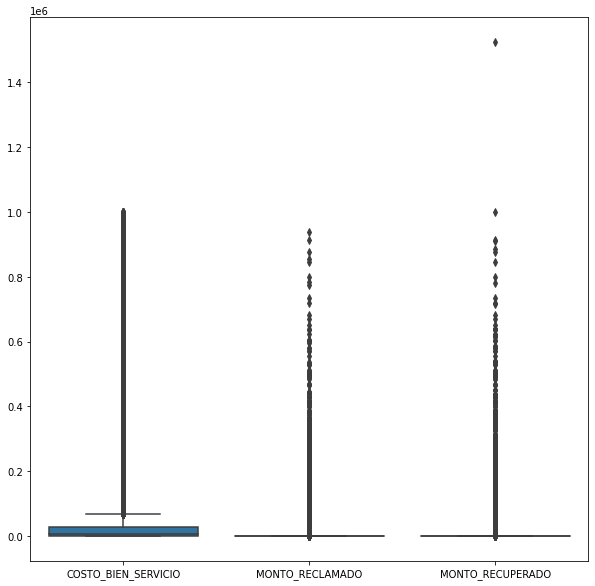

In [27]:
plt.figure(figsize=(10,10))
sns.boxplot(df_CBS_filtrado)

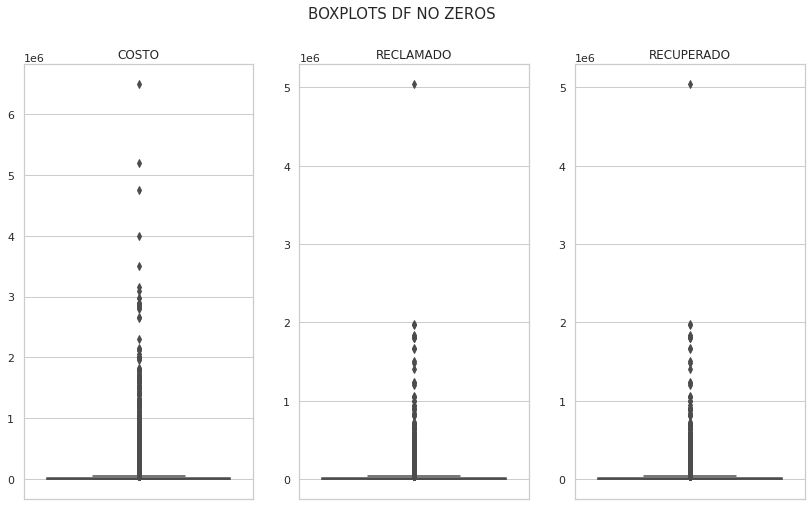

In [20]:
fig, axes = plt.subplots(1, 3, figsize=(14, 8), sharex=False, sharey=False)

sns.boxplot(y = df_no_zeros["COSTO_BIEN_SERVICIO"], ax=axes[0])
sns.boxplot(y = df_no_zeros["MONTO_RECLAMADO"], ax=axes[1])
sns.boxplot(y = df_no_zeros["MONTO_RECUPERADO"], ax=axes[2])

axes[0].set(xlabel='', ylabel='', title='COSTO')
axes[1].set(xlabel='', ylabel='', title='RECLAMADO')
axes[2].set(xlabel='', ylabel='', title='RECUPERADO')

fig.suptitle('BOXPLOTS DF NO ZEROS', fontsize=15);

In [51]:
#2.Score de Rango Intercuartílico
iqr = df['COSTO_BIEN_SERVICIO'].quantile(0.75) - df['COSTO_BIEN_SERVICIO'].quantile(0.25)
filtro_inferior = df['COSTO_BIEN_SERVICIO'] > df['COSTO_BIEN_SERVICIO'].quantile(0.25) - (iqr * 1.5)
filtro_superior = df['COSTO_BIEN_SERVICIO'] < df['COSTO_BIEN_SERVICIO'].quantile(0.75) + (iqr * 1.5)

df_filtrado = df[filtro_inferior & filtro_superior]

<Axes: >

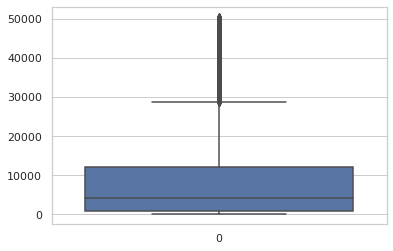

In [ ]:
sns.boxplot(df_filtrado['COSTO_BIEN_SERVICIO'])

In [52]:
iqr_reclamado = df['MONTO_RECLAMADO'].quantile(0.75) - df['MONTO_RECLAMADO'].quantile(0.25)
filtro_inferior_reclamado = df['MONTO_RECLAMADO'] > df['MONTO_RECLAMADO'].quantile(0.25) - (iqr * 1.5)
filtro_superior_reclamado = df['MONTO_RECLAMADO'] < df['MONTO_RECLAMADO'].quantile(0.75) + (iqr * 1.5)

df_filtrado_reclamado = df[filtro_inferior_reclamado & filtro_superior_reclamado]

<Axes: >

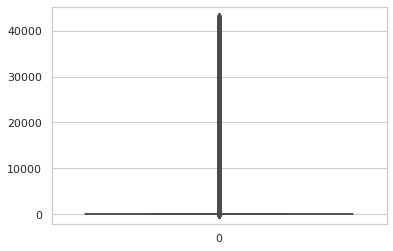

In [ ]:
sns.boxplot(df_filtrado_reclamado['MONTO_RECLAMADO'])

In [53]:
iqr_recuperado = df['MONTO_RECUPERADO'].quantile(0.75) - df['MONTO_RECUPERADO'].quantile(0.25)
filtro_inferior_recuperado = df['MONTO_RECUPERADO'] > df['MONTO_RECUPERADO'].quantile(0.25) - (iqr * 1.5)
filtro_superior_recuperado = df['MONTO_RECUPERADO'] < df['MONTO_RECUPERADO'].quantile(0.75) + (iqr * 1.5)

df_filtrado_recuperado = df[filtro_inferior_recuperado & filtro_superior_recuperado]

<Axes: >

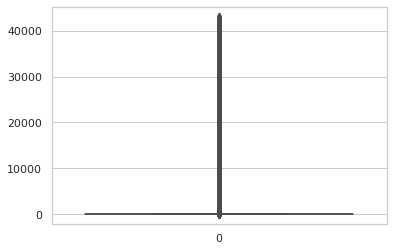

In [25]:
sns.boxplot(df_filtrado_recuperado['MONTO_RECUPERADO'])

In [46]:
#3. Tablas de frecuencia e histogramas
costos = df['COSTO_BIEN_SERVICIO']
costos.max() - costos.min()

20000000.0

In [47]:
segmentos = pd.cut(costos, 20)

df['COSTO_BIEN_SERVICIO'].groupby(segmentos).count()

COSTO_BIEN_SERVICIO
(-20000.0, 1000000.0]       81598
(1000000.0, 2000000.0]        668
(2000000.0, 3000000.0]        288
(3000000.0, 4000000.0]        116
(4000000.0, 5000000.0]         58
(5000000.0, 6000000.0]         36
(6000000.0, 7000000.0]         11
(7000000.0, 8000000.0]          7
(8000000.0, 9000000.0]          5
(9000000.0, 10000000.0]         1
(10000000.0, 11000000.0]        0
(11000000.0, 12000000.0]        1
(12000000.0, 13000000.0]        0
(13000000.0, 14000000.0]        0
(14000000.0, 15000000.0]        0
(15000000.0, 16000000.0]        0
(16000000.0, 17000000.0]        0
(17000000.0, 18000000.0]        0
(18000000.0, 19000000.0]        0
(19000000.0, 20000000.0]        1
Name: COSTO_BIEN_SERVICIO, dtype: int64

In [48]:
segmentos_reclamado = pd.cut(df['MONTO_RECLAMADO'], 20)

df['MONTO_RECLAMADO'].groupby(segmentos_reclamado).count()

MONTO_RECLAMADO
(-8247.0, 412350.0]       82678
(412350.0, 824700.0]         80
(824700.0, 1237050.0]        15
(1237050.0, 1649400.0]        4
(1649400.0, 2061750.0]        9
(2061750.0, 2474100.0]        2
(2474100.0, 2886450.0]        0
(2886450.0, 3298800.0]        0
(3298800.0, 3711150.0]        0
(3711150.0, 4123500.0]        0
(4123500.0, 4535850.0]        0
(4535850.0, 4948200.0]        0
(4948200.0, 5360550.0]        1
(5360550.0, 5772900.0]        0
(5772900.0, 6185250.0]        0
(6185250.0, 6597600.0]        0
(6597600.0, 7009950.0]        0
(7009950.0, 7422300.0]        0
(7422300.0, 7834650.0]        0
(7834650.0, 8247000.0]        1
Name: MONTO_RECLAMADO, dtype: int64

In [49]:
segmentos_recuperado = pd.cut(df['MONTO_RECUPERADO'], 20)

df['MONTO_RECUPERADO'].groupby(segmentos_recuperado).count()

MONTO_RECUPERADO
(-5047.5, 252375.0]       82552
(252375.0, 504750.0]        152
(504750.0, 757125.0]         39
(757125.0, 1009500.0]        14
(1009500.0, 1261875.0]       11
(1261875.0, 1514250.0]        4
(1514250.0, 1766625.0]        4
(1766625.0, 2019000.0]        8
(2019000.0, 2271375.0]        1
(2271375.0, 2523750.0]        1
(2523750.0, 2776125.0]        1
(2776125.0, 3028500.0]        1
(3028500.0, 3280875.0]        0
(3280875.0, 3533250.0]        0
(3533250.0, 3785625.0]        0
(3785625.0, 4038000.0]        0
(4038000.0, 4290375.0]        0
(4290375.0, 4542750.0]        0
(4542750.0, 4795125.0]        1
(4795125.0, 5047500.0]        1
Name: MONTO_RECUPERADO, dtype: int64

<Axes: xlabel='COSTO_BIEN_SERVICIO'>

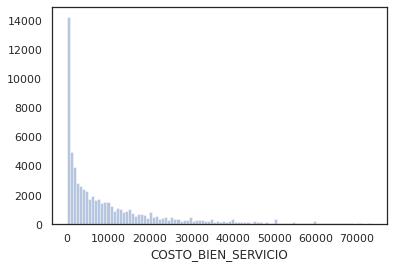

In [54]:
sns.set(style='white')
sns.distplot(df_filtrado['COSTO_BIEN_SERVICIO'], kde=False, norm_hist=False, bins=100)

In [30]:
#Asimetría y Curtosis
datos = df_filtrado['COSTO_BIEN_SERVICIO']
print(f'Curtosis: {kurtosis(datos)}')
print(f'Asimetría: {skew(datos)}')

Curtosis: 2.9818914252447906
Asimetría: 1.8222665643409293


<Axes: xlabel='MONTO_RECLAMADO'>

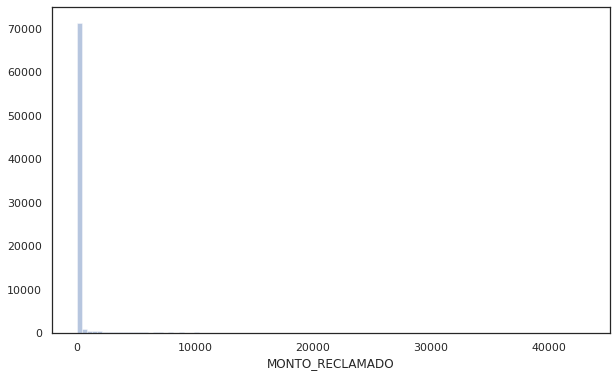

In [56]:
plt.figure(figsize=(10, 6))
sns.distplot(df_filtrado_reclamado['MONTO_RECLAMADO'], kde=False, norm_hist=False, bins=100)

In [57]:
#Asimetría y Curtosis
datos = df_filtrado_reclamado['MONTO_RECLAMADO']
print(f'Curtosis: {kurtosis(datos)}')
print(f'Asimetría: {skew(datos)}')

Curtosis: 32.221716831193014
Asimetría: 5.335744743906709


<Axes: xlabel='MONTO_RECUPERADO'>

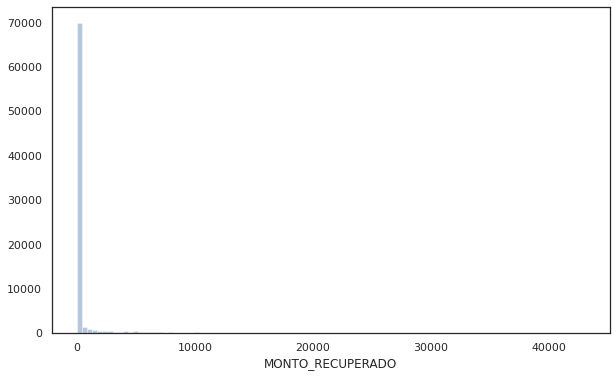

In [58]:
plt.figure(figsize=(10, 6))
sns.distplot(df_filtrado_recuperado['MONTO_RECUPERADO'], kde=False, norm_hist=False, bins=100)

In [59]:
#Asimetría y Curtosis
asimetria = df_filtrado_recuperado['MONTO_RECUPERADO']
print(f'Curtosis: {kurtosis(asimetria)}')
print(f'Asimetría: {skew(asimetria)}')

Curtosis: 34.211497293053526
Asimetría: 5.453409788892759


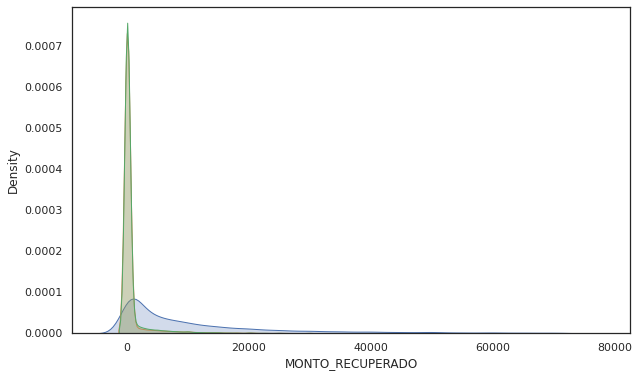

In [60]:
#4. Gráficas de densidad
sns.set(style='white')
plt.figure(figsize=(10, 6))

costo_den = df_filtrado['COSTO_BIEN_SERVICIO']
reclamado_den = df_filtrado_reclamado['MONTO_RECLAMADO']
recuperado_den = df_filtrado_recuperado['MONTO_RECUPERADO']

sns.distplot(costo_den, hist = False, kde_kws = {'shade': True})
sns.distplot(reclamado_den, hist = False, kde_kws = {'shade': True})
sns.distplot(recuperado_den, hist = False, kde_kws = {'shade': True});

# **3. Exploración de Variables Categóricas y Análisis Multivariable** (Postwork 3)

**DESARROLLO**

Explorar las distribuciones de las variables categóricas de nuestro dataset. En el postwork pasado exploramos las variables numéricas y ya deberías de tener una idea general bastante buena de cómo están organizadas. Ahora es momento de hacer análisis de variables categóricas y análisis multivariable. Realiza los siguientes pasos si tiene sentido aplicarlos a tu conjunto de datos:

1. Si ya tienes gráficas realizadas en Postworks anteriores, agrega títulos, anotaciones y leyendas donde sea necesario. También cambia el tamaño de las gráficas donde tenga sentido hacerlo.

2. Identifica todas las variables categóricas en tu dataset.

3. Utiliza gráficas de barras para explorar la distribución de tus variables categóricas.

4. Planea tu análisis multivariable: ¿qué combinaciones de variables categóricas podrían darme información útil acerca de la distribución de mis datos? ¿qué combinaciones de una variable numérica con una variable categórica podrían ser interesantes?

5. Utiliza tablas de contingencia y múltiples gráficas en la misma figure para explorar combinaciones de variables categóricas.

6. Utiliza boxplots y violinplots para explorar combinaciones de variables numéricas con variables categóricas.

7. De preferencia ve registrando por escrito (ahí mismo en tu Notebook) todos tus hallazgos. Describe qué vas descubriendo y qué podría significar.

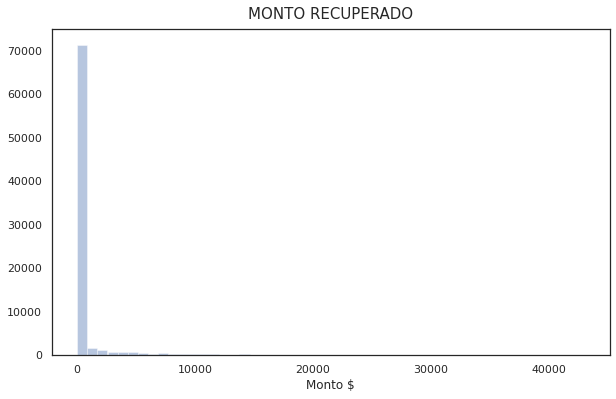

In [61]:
#1. Modificar gráficas
plt.figure(figsize=(10, 6))
ax = sns.distplot(df_filtrado_recuperado['MONTO_RECUPERADO'], kde=False, norm_hist=False, bins=50)
ax.set_title("MONTO RECUPERADO", fontsize = 15, pad = 10)
ax.set_xlabel("Monto $");


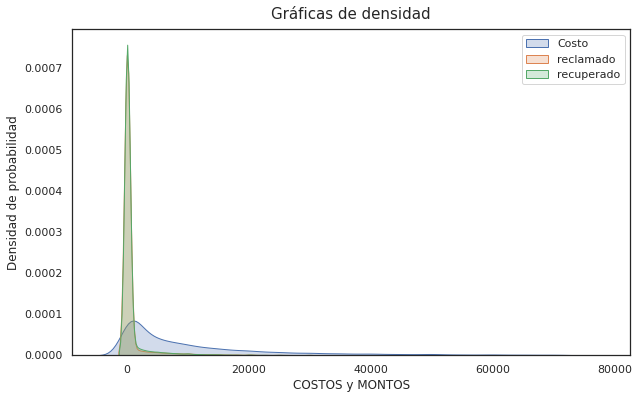

In [62]:
sns.set(style='white')
plt.figure(figsize=(10, 6))

costo_den = df_filtrado['COSTO_BIEN_SERVICIO']
reclamado_den = df_filtrado_reclamado['MONTO_RECLAMADO']
recuperado_den = df_filtrado_recuperado['MONTO_RECUPERADO']

ax = sns.distplot(costo_den, hist = False, kde_kws = {'shade': True}, label = "Costo")
ax = sns.distplot(reclamado_den, hist = False, kde_kws = {'shade': True}, label = 'reclamado')
ax = sns.distplot(recuperado_den, hist = False, kde_kws = {'shade': True}, label = 'recuperado')

ax.set_title('Gráficas de densidad', fontsize = 15, pad = 10)
ax.set_ylabel('Densidad de probabilidad', size = 12)
ax.set_xlabel('COSTOS y MONTOS', size = 12)
ax.legend(loc=0);

2. Variables categoricas

Para el dataset que se está trabajando tenemos las siguientes variables catégoricas

* TIPO_CONCILIACION
* ESTADO_PROCESAL
* ESTADO
* MEDIO INGRESO


In [125]:
df['ESTADO_PROCESAL'].unique()

array(['Desistimiento', 'Conciliada', 'Improcedente', 'En Trámite',
       'No Conciliada', 'Turnada a Concil Medios Elec.',
       'Turnada a Concil Person p/seg'], dtype=object)

In [126]:
counts = df['ESTADO_PROCESAL'].value_counts()
counts

En Trámite                       34937
Conciliada                       24811
Desistimiento                    15911
No Conciliada                     6695
Improcedente                       426
Turnada a Concil Medios Elec.        9
Turnada a Concil Person p/seg        1
Name: ESTADO_PROCESAL, dtype: int64

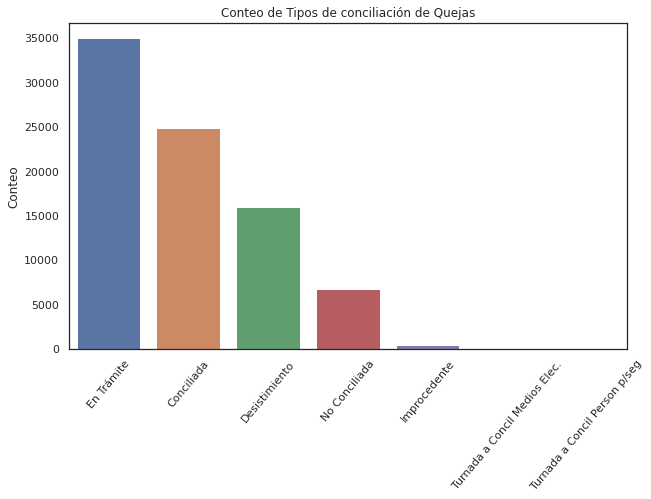

In [127]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x = counts.index, y = counts)
ax.set_title('Conteo de Tipos de conciliación de Quejas')
ax.set(ylabel='Conteo')
ax.set_xticklabels(ax.get_xticklabels(), rotation=50);

In [66]:
df['ESTADO_PROCESAL'].unique()

array(['Desistimiento', 'Conciliada', 'Improcedente', 'En Trámite',
       'No Conciliada', 'Turnada a Concil Medios Elec.',
       'Turnada a Concil Person p/seg'], dtype=object)

In [67]:
counts = df['ESTADO_PROCESAL'].value_counts()
porcentajes = counts * 100 / counts.sum()
porcentajes

En Trámite                       42.199541
Conciliada                       29.968595
Desistimiento                    19.218505
No Conciliada                     8.086725
Improcedente                      0.514555
Turnada a Concil Medios Elec.     0.010871
Turnada a Concil Person p/seg     0.001208
Name: ESTADO_PROCESAL, dtype: float64

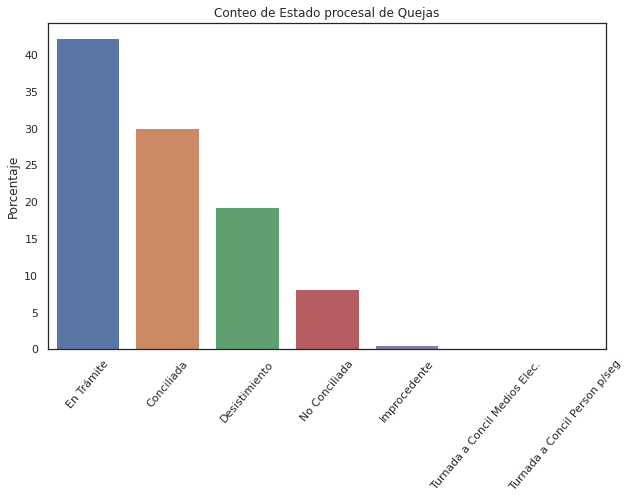

In [68]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x = porcentajes.index, y = porcentajes)
ax.set_title('Conteo de Estado procesal de Quejas')
ax.set(ylabel='Porcentaje')
ax.set_xticklabels(ax.get_xticklabels(), rotation=50);

In [69]:
df['ESTADO'].unique()

array(['AGUASCALIENTES', 'CIUDAD DE MÉXICO', 'BAJA CALIFORNIA',
       'CAMPECHE', 'CHIHUAHUA', 'GUANAJUATO', 'HIDALGO', 'JALISCO',
       'EDO. DE MÉXICO', 'MICHOACÁN', 'MORELOS', 'NUEVO LEÓN', 'PUEBLA',
       'QUERÉTARO', 'TAMAULIPAS', 'SAN LUIS POTOSÍ', 'SONORA', 'TABASCO',
       'COAHUILA', 'VERACRUZ', 'YUCATÁN', 'DURANGO', 'GUERRERO', 'OAXACA',
       'QUINTANA ROO', 'ZACATECAS', 'SINALOA', 'NAYARIT',
       'BAJA CALIFORNIA SUR', 'CHIAPAS', 'COLIMA'], dtype=object)

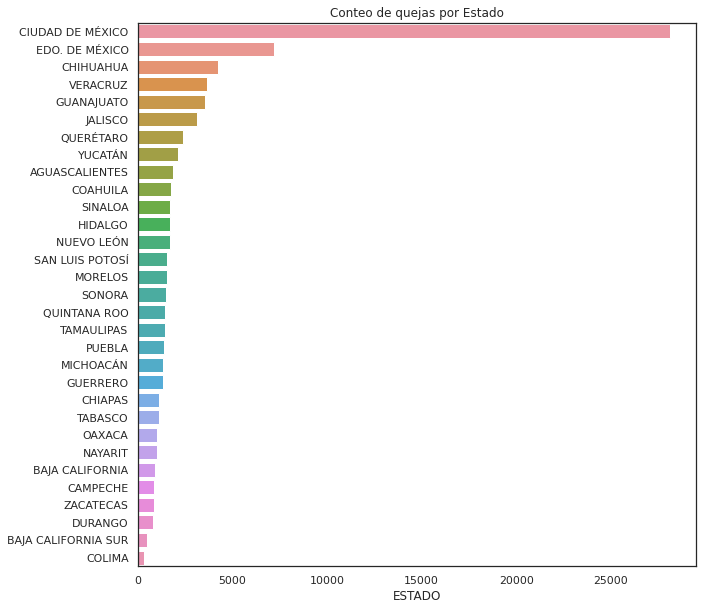

In [70]:
plt.figure(figsize=(10, 10))
ax = sns.barplot(y = df['ESTADO'].value_counts().index,
                 x = df['ESTADO'].value_counts())
ax.set_title('Conteo de quejas por Estado');

In [71]:
df['MEDIO_INGRESO'].unique()

array(['Personal', 'Internet', 'Correo Electrónico', 'Escrito', 'Chat',
       'Teléfono'], dtype=object)

In [72]:
df['MEDIO_INGRESO'].value_counts()

Personal              54351
Escrito               14118
Internet              13317
Correo Electrónico      984
Teléfono                 18
Chat                      2
Name: MEDIO_INGRESO, dtype: int64

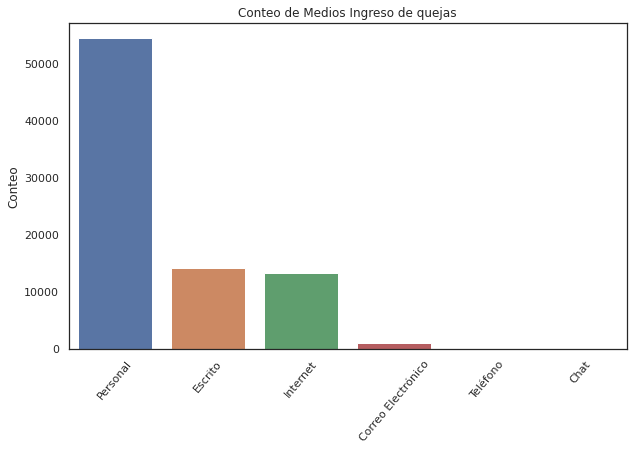

In [73]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(y = df['MEDIO_INGRESO'].value_counts(), x = df['MEDIO_INGRESO'].value_counts().index)
ax.set_title('Conteo de Medios Ingreso de quejas')
ax.set(ylabel='Conteo')
ax.set_xticklabels(ax.get_xticklabels(), rotation=50);

In [74]:
df['SECTOR'].value_counts().head(20)



TURÍSTICO                                                                   10440
ELECTRICIDAD                                                                 9866
TIENDA DEPARTAMENTAL                                                         5098
AUTOMOTRIZ                                                                   4077
VENTAS POR INTERNET                                                          3991
TIENDAS DE AUTOSERVICIO                                                      3922
COMPAÑÍA DE AUTOFINANCIAMIENTO                                               3299
TELECOMUNICACIONES                                                           2895
TALLER MECÁNICO                                                              2461
INMOBILIARIO                                                                 2183
FABRICACIÓN DE ELECTRODOMÉSTICOS Y LÍNEA BLANCA                              1724
COMPAÑÍAS ESPECIALIZADAS EN SERVICIOS FINANCIEROS, DE SEGURO Y DE VIAJES     1680
MUEBLERO        

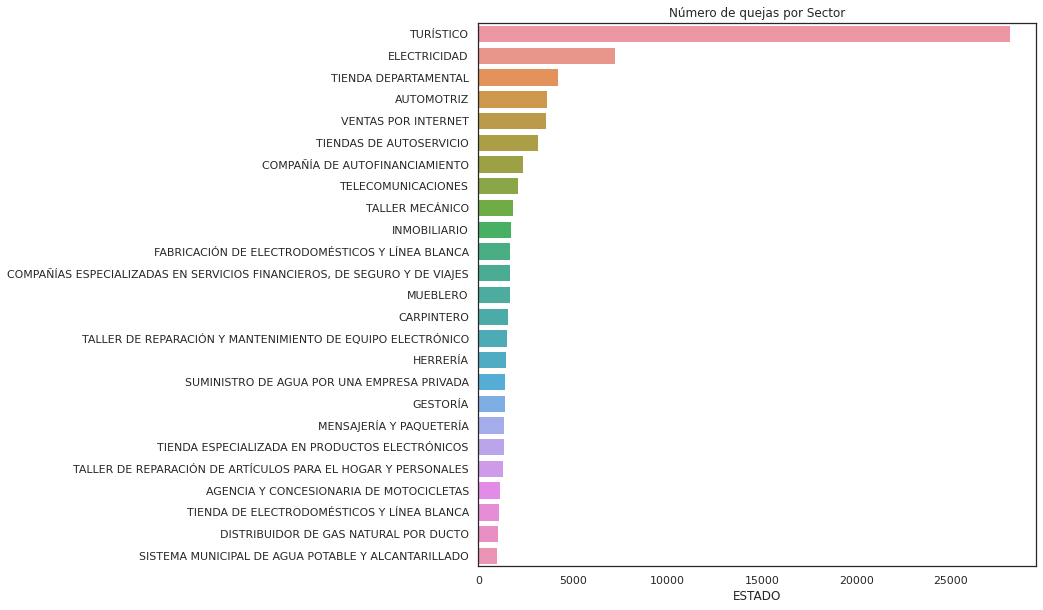

In [75]:
plt.figure(figsize=(10, 10))
ax = sns.barplot(y = df['SECTOR'].value_counts().head(25).index,
                 x = df['ESTADO'].value_counts().head(25))
ax.set_title('Número de quejas por Sector');

In [76]:
#4. Planea tu análisis multivariable: ¿qué combinaciones de variables categóricas podrían darme información útil acerca de la distribución de mis datos? ¿qué combinaciones de una variable numérica con una variable categórica podrían ser interesantes?
# para responder esta pregunta podemos usar la variable estado como catégorica con las 3 variables númericas

#5. Tablas de contingencia
pd.crosstab(df['ESTADO'], df['ESTADO_PROCESAL'], margins=True, margins_name = 'TOTAL')

ESTADO_PROCESAL,Conciliada,Desistimiento,En Trámite,Improcedente,No Conciliada,Turnada a Concil Medios Elec.,Turnada a Concil Person p/seg,TOTAL
ESTADO,,,,,,,,
AGUASCALIENTES,642,515,670,6,23,0,0,1856
BAJA CALIFORNIA,397,106,209,2,200,0,0,914
BAJA CALIFORNIA SUR,111,54,269,0,46,0,0,480
CAMPECHE,263,113,419,1,55,0,0,851
CHIAPAS,455,131,332,1,207,0,0,1126
CHIHUAHUA,1127,286,2455,1,356,0,0,4225
CIUDAD DE MÉXICO,6832,7970,11655,352,1290,9,0,28108
COAHUILA,880,44,546,0,256,0,0,1726
COLIMA,105,13,144,0,30,0,0,292


In [77]:
#Agregando una tercera variable catégorica
pd.crosstab(df['ESTADO'], [df['BIEN_O_SERVICIO'], df['ESTADO_PROCESAL']], margins=True, margins_name = 'TOTAL')

BIEN_O_SERVICIO           Bien                                        \
ESTADO_PROCESAL     Conciliada Desistimiento En Trámite Improcedente   
ESTADO                                                                 
AGUASCALIENTES             238           109        225            4   
BAJA CALIFORNIA            125            46         61            0   
BAJA CALIFORNIA SUR         50            20         94            0   
CAMPECHE                   155            50        309            0   
CHIAPAS                    186            56        147            0   
CHIHUAHUA                  383            87        536            0   
CIUDAD DE MÉXICO          2290          2685       3731          121   
COAHUILA                   364            11        179            0   
COLIMA                      71             6         83            0   
DURANGO                    130            51        113            0   
EDO. DE MÉXICO            1106           460        943            0   
GUANAJUATO                 525           126        586            0   
GUERRERO                   154            11        202            0   
HIDALGO                    192            89        168            2   
JALISCO                    453           256        664            4   
MICHOACÁN                  210            20        313            0   
MORELOS                    223            89        174            0   
NAYARIT                    115            61        126            0   
NUEVO LEÓN                 160           139        375            0   
OAXACA                      96            39        342            0   
PUEBLA                     297            74        284            1   
QUERÉTARO                  275           141        422            2   
QUINTANA ROO               220            57        297            1   
SAN LUIS POTOSÍ            243            61        186            0   
SINALOA                    211           182        246            0   
SONORA                     298            81        261            0   
TABASCO                    201           118        201            0   
TAMAULIPAS                 329           112        200            8   
VERACRUZ                   172            47        821            0   
YUCATÁN                    554           164        300            0   
ZACATECAS                  140            49         78            0   
TOTAL                    10166          5497      12667          143   

BIEN_O_SERVICIO                                                   Servicio  \
ESTADO_PROCESAL     No Conciliada Turnada a Concil Medios Elec. Conciliada   
ESTADO                                                                       
AGUASCALIENTES                  9                             0        404   
BAJA CALIFORNIA                52                             0        272   
BAJA CALIFORNIA SUR            11                             0         61   
CAMPECHE                       17                             0        108   
CHIAPAS                        71                             0        269   
CHIHUAHUA                     105                             0        744   
CIUDAD DE MÉXICO              382                             5       4542   
COAHUILA                       63                             0        516   
COLIMA                         17                             0         34   
DURANGO                        36                             0        185   
EDO. DE MÉXICO                230                             0       1210   
GUANAJUATO                    119                             0        770   
GUERRERO                       17                             0        328   
HIDALGO                        60                             0        397   
JALISCO                        21                             0        541   
MICHOACÁN                      46                             0        251 

In [78]:
#Agregando una tercera variable catégorica y agregando stack
pd.crosstab(df['ESTADO'], [df['BIEN_O_SERVICIO'], df['ESTADO_PROCESAL']], margins=True, margins_name = 'TOTAL').stack(level=0)

ESTADO_PROCESAL                           Conciliada  Desistimiento  \
ESTADO          BIEN_O_SERVICIO                                       
AGUASCALIENTES  Bien                 NaN       238.0          109.0   
                Servicio             NaN       404.0          406.0   
                TOTAL             1856.0         NaN            NaN   
BAJA CALIFORNIA Bien                 NaN       125.0           46.0   
                Servicio             NaN       272.0           60.0   
...                                  ...         ...            ...   
ZACATECAS       Servicio             NaN       193.0           96.0   
                TOTAL              827.0         NaN            NaN   
TOTAL           Bien                 NaN     10166.0         5497.0   
                Servicio             NaN     14645.0        10414.0   
                TOTAL            82790.0         NaN            NaN   

ESTADO_PROCESAL                  En Trámite  Improcedente  No Conciliada  \
ESTADO          BIEN_O_SERVICIO                                            
AGUASCALIENTES  Bien                  225.0           4.0            9.0   
                Servicio              445.0           2.0           14.0   
                TOTAL                   NaN           NaN            NaN   
BAJA CALIFORNIA Bien                   61.0           0.0           52.0   
                Servicio              148.0           2.0          148.0   
...                                     ...           ...            ...   
ZACATECAS       Servicio              132.0           0.0           99.0   
                TOTAL                   NaN           NaN            NaN   
TOTAL           Bien                12667.0         143.0         2218.0   
                Servicio            22270.0         283.0         4477.0   
                TOTAL                   NaN           NaN            NaN   

ESTADO_PROCESAL                  Turnada a Concil Medios Elec.  \
ESTADO          BIEN_O_SERVICIO                                  
AGUASCALIENTES  Bien                                       0.0   
                Servicio                                   0.0   
                TOTAL                                      NaN   
BAJA CALIFORNIA Bien                                       0.0   
                Servicio                                   0.0   
...                                                        ...   
ZACATECAS       Servicio                                   0.0   
                TOTAL                                      NaN   
TOTAL           Bien                                       5.0   
                Servicio                                   4.0   
                TOTAL                                      NaN   

ESTADO_PROCESAL                  Turnada a Concil Person p/seg  
ESTADO          BIEN_O_SERVICIO                                 
AGUASCALIENTES  Bien                                       NaN  
                Servicio                                   0.0  
                TOTAL                                      NaN  
BAJA CALIFORNIA Bien                                       NaN  
                Servicio                                   0.0  
...                                                        ...  
ZACATECAS       Servicio                                   0.0  
                TOTAL                                      NaN  
TOTAL           Bien                                       NaN  
                Servicio                                   1.0  
                TOTAL                                      NaN  

[96 rows x 8 columns]

In [79]:
crosstab = pd.crosstab(df['ESTADO'], df['ESTADO_PROCESAL'])
crosstab.loc['CIUDAD DE MÉXICO']

ESTADO_PROCESAL
Conciliada                        6832
Desistimiento                     7970
En Trámite                       11655
Improcedente                       352
No Conciliada                     1290
Turnada a Concil Medios Elec.        9
Turnada a Concil Person p/seg        0
Name: CIUDAD DE MÉXICO, dtype: int64

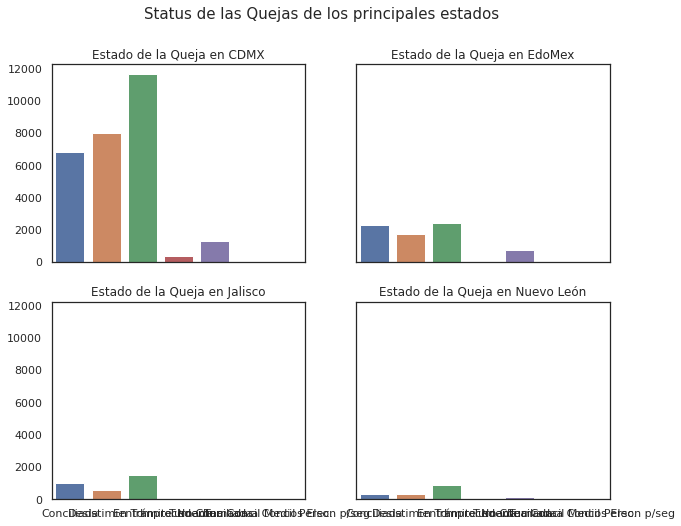

In [80]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8), sharex=True, sharey=True)

sns.barplot(x = crosstab.columns, y = crosstab.loc['CIUDAD DE MÉXICO'], ax=axes[0, 0])
sns.barplot(x = crosstab.columns, y = crosstab.loc['EDO. DE MÉXICO'], ax=axes[0, 1])
sns.barplot(x = crosstab.columns, y = crosstab.loc['JALISCO'], ax=axes[1, 0])
sns.barplot(x = crosstab.columns, y = crosstab.loc['NUEVO LEÓN'], ax=axes[1, 1])

axes[0, 0].set(xlabel='', ylabel='', title='Estado de la Queja en CDMX')
axes[0, 1].set(xlabel='', ylabel='', title='Estado de la Queja en EdoMex')
axes[1, 0].set(xlabel='', ylabel='', title='Estado de la Queja en Jalisco')
axes[1, 1].set(xlabel='', ylabel='', title='Estado de la Queja en Nuevo León')

fig.suptitle('Status de las Quejas de los principales estados', fontsize=15);

In [81]:
#6 Bloxplots y violinplots
por_estado = df.groupby(level=0)[['COSTO_BIEN_SERVICIO','MONTO_RECLAMADO','MONTO_RECUPERADO']].mean()
por_tipo = df.groupby(level=0)['BIEN_O_SERVICIO'].last()
merged = por_estado.merge(por_tipo, left_index=True, right_index=True)

In [82]:
merged

,COSTO_BIEN_SERVICIO,MONTO_RECLAMADO,MONTO_RECUPERADO,BIEN_O_SERVICIO
0,25782.085000,24784.585000,24784.585000,Servicio
1,9439.990000,0.000000,0.000000,Bien
2,11619.500000,9369.500000,9368.500000,Servicio
3,6052.633333,319.666667,5889.333333,Servicio
4,2999.500000,0.000000,0.000000,Servicio
...,...,...,...,...
41993,4597.000000,0.000000,0.000000,Servicio
41994,7190.700000,0.000000,0.000000,Servicio
41995,216492.000000,0.000000,0.000000,Servicio
41996,1711.000000,0.000000,0.000000,Servicio


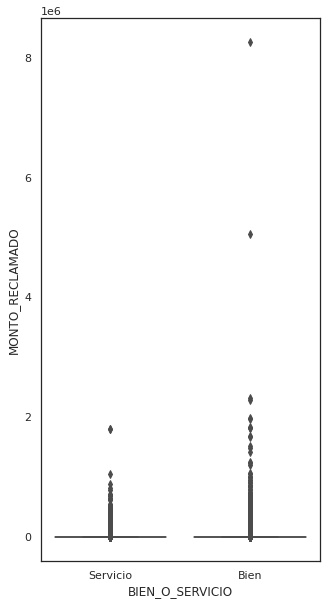

In [64]:
plt.figure(figsize=(5, 10))
sns.boxplot(data=merged, x='BIEN_O_SERVICIO', y='MONTO_RECLAMADO');

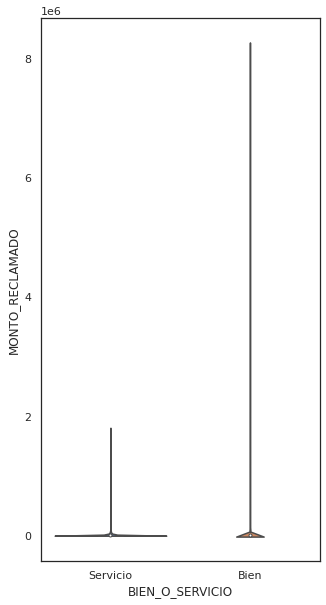

In [65]:
plt.figure(figsize=(5, 10))
sns.violinplot(data=merged, x='BIEN_O_SERVICIO', y='MONTO_RECLAMADO');

#**4. Correlaciones y Regresión Linear Simple** (Postwork 4)
**DESARROLLO**

En este Postwork vamos a hacer análisis bivariado de nuestras variables numéricas. Si tu dataset sólo tiene variables categóricas o datos no estructurados (texto libre), entonces puedes pedirle a tu experta que te comparta algún dataset con el que puedas realizar estos ejercicios.

Utilizando tu dataset, realiza las siguientes actividades:

1. Identifica cuáles son las variables numéricas en tu dataset.
   * COSTO_BIEN_SERVICIO
   * MONTO_RECLAMADO
   * MONTO_RECUPERADO

2. Asegúrate de que tengan el tipo de dato correcto y que no haya NaNs por ahí escondidos.
3. Genera una matriz de correlaciones y un pairplot para visualizar de manera general las relaciones entre tus variables numéricas.
4. Utilizando gráficas de dispersión y tus medidas de locación y dispersión, identifica dónde hay valores atípicos y decide qué hacer con ellos.
5. Revisa si tu revisión de valores atípicos cambió de alguna manera las relaciones existentes.
6. Donde consideres necesario, entrena modelos de Regresión Lineal con un o más pares de variables. Incluso si no te parece que realizar predicciones entre pares de variables tiene sentido para tu proyecto, prueba realizar un par de regresiones para que practiques el procedimiento.

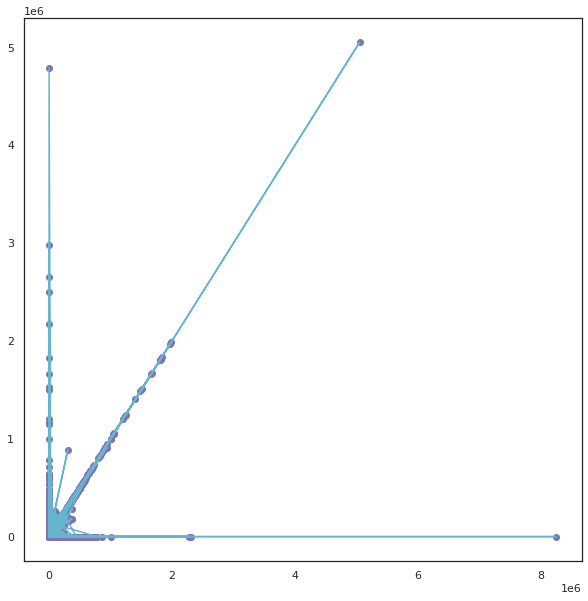

In [83]:
plt.figure(figsize=(10, 10))
plt.scatter(df['MONTO_RECLAMADO'],df['MONTO_RECUPERADO'], c='m')
plt.plot(df['MONTO_RECLAMADO'],df['MONTO_RECUPERADO'], c='c')

In [84]:
#CORRELACION DE PEARSON
print(f'Correlación entre MONTO_RECLAMADO con MONTO_RECUPERADO: {df["MONTO_RECLAMADO"].corr(df["MONTO_RECUPERADO"])}')

#Se tiene una correlación positiva lo que indica que si la variable a aumenta implica también un aumento de la variable b

Correlación entre MONTO_RECLAMADO con MONTO_RECUPERADO: 0.552456676091954


In [92]:
df_filtered = df_sinna.drop(columns=['MES_NUM'])

In [93]:
df_filtered.corr()

,COSTO_BIEN_SERVICIO,MONTO_RECLAMADO,MONTO_RECUPERADO
COSTO_BIEN_SERVICIO,1.000000,0.448387,0.420969
MONTO_RECLAMADO,0.448387,1.000000,0.544357
MONTO_RECUPERADO,0.420969,0.544357,1.000000


In [94]:
def show_corr_heatmap(df, title):
    
    corr = df.corr()
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True

    plt.figure(figsize = (8, 6))
    plt.title(title)
    sns.heatmap(corr, annot = True, linewidths=.5, fmt=".2f", square=True, mask = mask)
    plt.show()

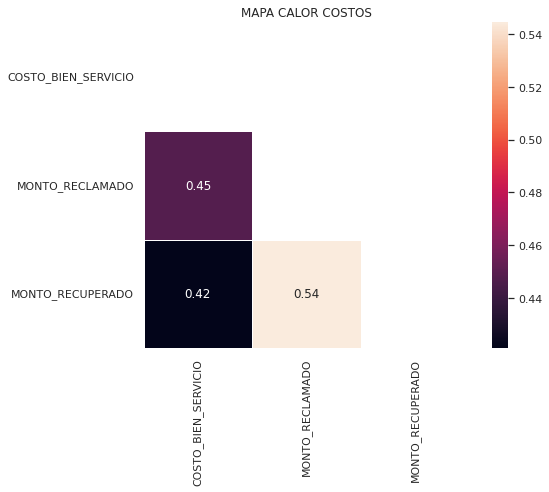

None

In [95]:
display(show_corr_heatmap(df_filtered,"MAPA CALOR COSTOS"))

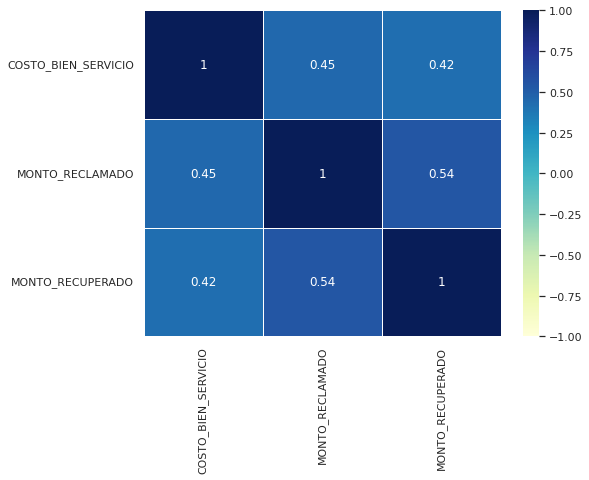

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.heatmap(df_filtered.corr(), vmin=-1, vmax=1, annot=True, cmap="YlGnBu", linewidths=.5);

<Axes: xlabel='MONTO_RECLAMADO', ylabel='MONTO_RECUPERADO'>

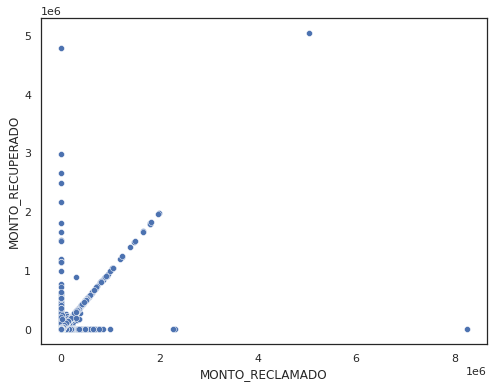

In [96]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x = df['MONTO_RECLAMADO'], y = df['MONTO_RECUPERADO'])

In [97]:
df_no_zeros = df[df['MONTO_RECLAMADO']>0]

In [98]:
df_no_zeros = df[df['MONTO_RECUPERADO']>0]

<Axes: xlabel='MONTO_RECLAMADO', ylabel='MONTO_RECUPERADO'>

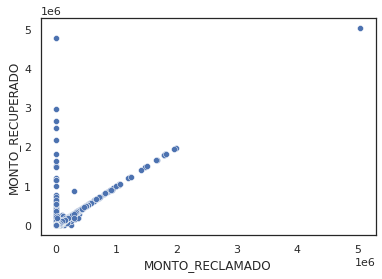

In [99]:
sns.scatterplot(x = df_no_zeros['MONTO_RECLAMADO'], y = df_no_zeros['MONTO_RECUPERADO'])

In [100]:
df_no_zeros['MONTO_RECLAMADO'].corr(df_no_zeros['MONTO_RECUPERADO'])

0.7452027742546606

<Axes: >

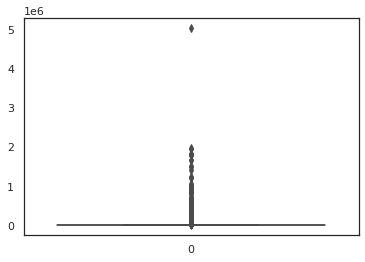

In [101]:
sns.boxplot(df_no_zeros['MONTO_RECLAMADO'])

In [102]:
iqr_reclamado = df_no_zeros['MONTO_RECLAMADO'].quantile(0.75) - df_no_zeros['MONTO_RECLAMADO'].quantile(0.25)
filter_upper_outliers = df_no_zeros['MONTO_RECLAMADO'] < (df_no_zeros['MONTO_RECLAMADO'].quantile(0.75) + iqr_reclamado * 1.5)
df_reclamado_no_outliers = df_no_zeros[filter_upper_outliers]

<Axes: xlabel='MONTO_RECLAMADO', ylabel='MONTO_RECUPERADO'>

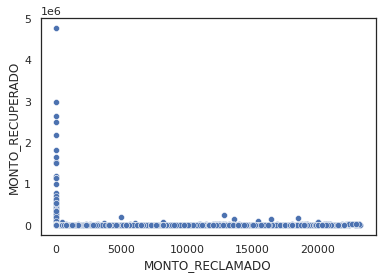

In [103]:
sns.scatterplot(x = df_reclamado_no_outliers['MONTO_RECLAMADO'], y = df_reclamado_no_outliers['MONTO_RECUPERADO'])

In [104]:
df_reclamado_no_outliers['MONTO_RECLAMADO'].corr(df_reclamado_no_outliers['MONTO_RECUPERADO'])

-0.0026226365688547747

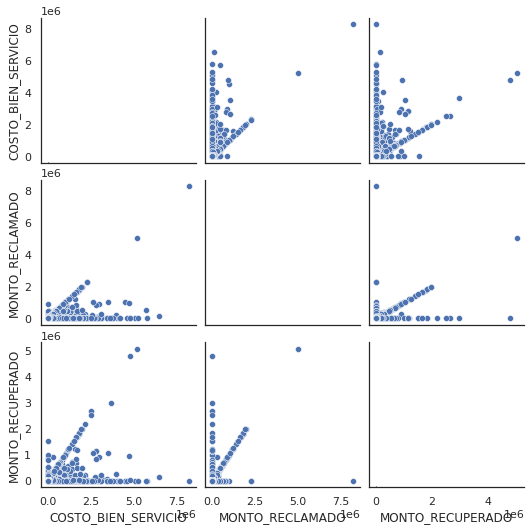

In [107]:
sns.pairplot(df_filtered)

In [108]:
#6. Regresion Lineal
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(df_no_zeros['MONTO_RECLAMADO'].to_frame(), df_no_zeros['MONTO_RECUPERADO'])

LinearRegression()

In [109]:
y_predict = lr.predict(df_no_zeros['MONTO_RECLAMADO'].to_frame())

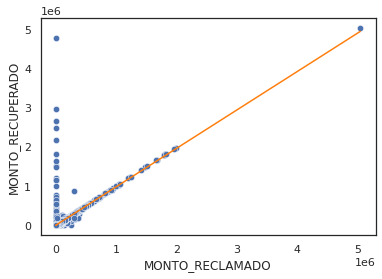

In [110]:
sns.scatterplot(x = df_no_zeros['MONTO_RECLAMADO'], y = df_no_zeros['MONTO_RECUPERADO'], s=40);
#sns.lineplot(x = df_no_zeros['MONTO_RECLAMADO'], y = y_predict, s=25);

sns.lineplot(x = df_no_zeros['MONTO_RECLAMADO'], y = y_predict, color='#FF7F0E');


In [111]:
intercept = lr.intercept_
coefficient = lr.coef_[0]

In [112]:
print(f'y = {coefficient} * x + {intercept}')

y = 0.9801157170966849 * x + 7006.147603154277


In [113]:
print(f'Valor de x: {df_no_zeros["MONTO_RECLAMADO"][10]}')
print(f'Valor predecido por nuestro modelo: {y_predict[10]}')
print(f'Valor cuantificado directamente usando la funcion: {coefficient * df_no_zeros["MONTO_RECLAMADO"][10] + intercept}')

Valor de x: 26999.0
Valor predecido por nuestro modelo: 7888.251748541294
Valor cuantificado directamente usando la funcion: 33468.29184904767


In [114]:
print(f'R2: {np.power(df_no_zeros["MONTO_RECLAMADO"].corr(df_no_zeros["MONTO_RECUPERADO"]), 2)}')

R2: 0.5553271747568427


In [115]:
lr.score(df_no_zeros['MONTO_RECLAMADO'].to_frame(), df_no_zeros['MONTO_RECUPERADO'])

0.5553271747568433

En este caso decimos entonces que nuestra variable 'MONTO_RECLAMADO' explica el 55.6% de la variabilidad de nuestra variable 'MONTO_RECUPERADO'. Todavía tenemos algunos valores en ambas variables que tal vez podrían ser considerados valores atípicos.



# **5. Distribuciones muestrales y técnicas de evaluación de modelos** (Postwork 5)
**DESARROLLO**

En este Postwork vamos a analizar la incertidumbre y los sesgos que existen en las medidas de locación y dispersión de nuestras variables numéricas. También vamos a practicar el entrenamiento de modelos de Regresión Lineal Múltiple, aunque eso no sea el objetivo de tu proyecto. Realiza los siguientes pasos:

1. Identifica las variables numéricas en tu dataset y revisa las medidas de locación y dispersión que ya has realizado de ellas.

   **R. Ver postwork 1**
2. Utilizando la técnica de bootstrap, explora las distribuciones muestrales de las estadísticas que obtuviste anteriormente y reporta:

    a) La distribución, su asimetría y curtosis

    b) El error estándar

    c) El intervalo de confianza que te parezca más apropiado

3. Si tiene sentido, elige algunas de tus variables numéricas para entrenar uno o más modelos de Regresión Lineal Múltiple. Utiliza las técnicas de división de dataset y validación cruzada de K-iteraciones para asegurarte de que tu modelo generalice.
4. Comparte con tus compañeros y la experta tus hallazgos.

In [116]:
#2 Bootstrap

recuperado = df_no_zeros['MONTO_RECUPERADO']

means = []

for i in range(100_000):
    sample = recuperado.sample(n=50, replace=True)
    means.append(sample.mean())
    
serie_means = pd.Series(means)

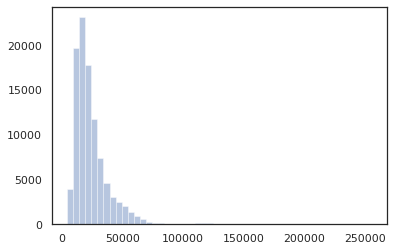

In [ ]:
sns.distplot(serie_means, kde=False, norm_hist=False);

In [ ]:
serie_means.skew()

2.7121783919944167

In [ ]:
serie_means.kurtosis()

12.87957784650328

In [ ]:
print(f'Error estandar: {serie_means.std()}')

Error estandar: 14865.775931507937


In [ ]:
print(f'Valor mínimo: {serie_means.min()}')
print(f'Valor máximo: {serie_means.max()}')
print(f'Rango: {serie_means.max() - serie_means.min()}')

Valor mínimo: 4524.986999999999
Valor máximo: 255205.93980000005
Rango: 250680.95280000006


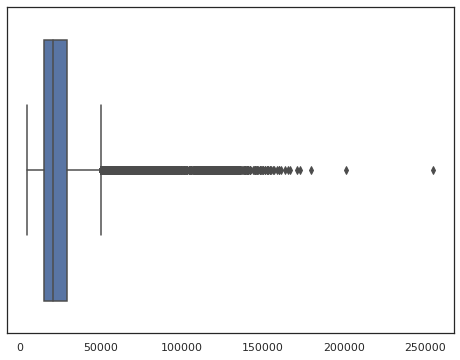

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x= serie_means);

In [ ]:
limite_inferior = serie_means.quantile(0.025)
limite_superior = serie_means.quantile(0.975)

In [ ]:
print(f'Intervalo de 95% confianza de la media: {limite_inferior} < {recuperado.mean()} < {limite_superior}')

Intervalo de 95% confianza de la media: 8849.991025 < 24294.162168956744 < 61137.09400999997


In [ ]:
mean_of_intervals = ((recuperado.mean() - limite_inferior) + (limite_superior - recuperado.mean())) / 2

print(f'Intervalo de 95% confianza de la media: {recuperado.mean()} +/- {mean_of_intervals}')

Intervalo de 95% confianza de la media: 24294.162168956744 +/- 26143.551492499988


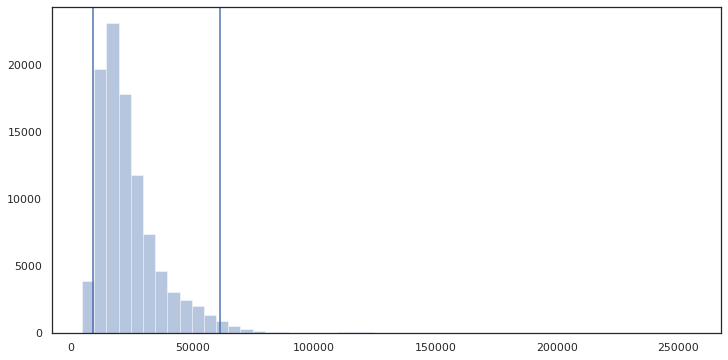

In [ ]:
plt.figure(figsize=(12, 6))
sns.distplot(serie_means, kde=False, norm_hist=False)
plt.axvline(limite_inferior)
plt.axvline(limite_superior);

In [ ]:
#Modelo regresión multiple
from sklearn.model_selection import train_test_split

In [ ]:
df_no_zeros.isna().sum()

FECHA_INGRESO           0
FECHA_CIERRE           94
TIPO_CONCILIACION       0
ESTADO_PROCESAL         0
PROVEEDOR               0
NOMBRE_COMERCIAL        0
GIRO                    0
SECTOR                  0
ESTADO                  0
TIPO_RECLAMACION        0
MOTIVO_RECLAMACION      0
COSTO_BIEN_SERVICIO     1
MONTO_RECLAMADO         0
MONTO_RECUPERADO        0
PROCEDIMIENTO           0
BIEN_O_SERVICIO         0
MEDIO_INGRESO           0
TIPO_PRODUCTO           0
MODALIDAD_COMPRA        0
MODALIDAD_PAGO          0
PROBLEMA_ESPECIAL       0
MES_NUM                 0
MES                     0
dtype: int64

In [ ]:
df_no_zeros['COSTO_BIEN_SERVICIO'] = df_no_zeros['COSTO_BIEN_SERVICIO'].fillna(value=0)

In [ ]:
df_no_zeros.isna().sum()

FECHA_INGRESO           0
FECHA_CIERRE           94
TIPO_CONCILIACION       0
ESTADO_PROCESAL         0
PROVEEDOR               0
NOMBRE_COMERCIAL        0
GIRO                    0
SECTOR                  0
ESTADO                  0
TIPO_RECLAMACION        0
MOTIVO_RECLAMACION      0
COSTO_BIEN_SERVICIO     0
MONTO_RECLAMADO         0
MONTO_RECUPERADO        0
PROCEDIMIENTO           0
BIEN_O_SERVICIO         0
MEDIO_INGRESO           0
TIPO_PRODUCTO           0
MODALIDAD_COMPRA        0
MODALIDAD_PAGO          0
PROBLEMA_ESPECIAL       0
MES_NUM                 0
MES                     0
dtype: int64

In [ ]:
X = df_no_zeros[['COSTO_BIEN_SERVICIO', 'MONTO_RECLAMADO']]
y = df_no_zeros['MONTO_RECUPERADO']

In [ ]:
X_training, X_test, y_training, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()
lr.fit(X_training, y_training)

LinearRegression()

In [ ]:
df_no_zeros['COSTO_BIEN_SERVICIO'].corr(df_no_zeros['MONTO_RECUPERADO'])

0.5846387847689439

In [ ]:
df_no_zeros['MONTO_RECUPERADO'].corr(df_no_zeros['MONTO_RECLAMADO'])

0.9931687420218458

In [ ]:
lr.score(X_test, y_test)

0.9896827696299441

Podemos concluir que existe una fuerte relación entre nuestras variables independientes con la dependiente

In [ ]:
X = df_no_zeros[['COSTO_BIEN_SERVICIO', 'MONTO_RECLAMADO']]
y = df_no_zeros['MONTO_RECUPERADO']

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [ ]:
scores = cross_validate(lr, X, y, scoring='r2')

In [ ]:
scores

{'fit_time': array([0.01420164, 0.00798965, 0.008389  , 0.00963354, 0.00715923]),
 'score_time': array([0.00295949, 0.00301266, 0.00285196, 0.00327039, 0.00244737]),
 'test_score': array([0.96070789, 0.98967625, 0.99554873, 0.97659285, 0.98917813])}

In [ ]:
print(f'Score del modelo: {scores["test_score"].mean():.3f} +/- {scores["test_score"].std():.3f}')

Score del modelo: 0.982 +/- 0.012


# **6. Visualización de Datos Avanzada** (Postwork 6)
**DESARROLLO**

En esta sesión conocimos muchos nuevos tipos de gráficas que nos ayudan a explorar y entender con más detalle nuestros datos. Ojalá y hayas percibido el poder tan grande que tienen las visualizaciones y la variedad tan enorme que existe. Cada visualización tiene sus ventajas y desventajas, sus características específicas, y es importante conocerlas bien para poder elegir la gráfica adecuada para cada momento. Revisa con detenimiento si hay alguna buena razón para utilizar en tu proyecto alguna de las gráficas que aprendimos hoy. Aquí hay un pequeño 'cheat sheet' para tomar estas decisiones:

1. Si hay relaciones jerárquicas que quieras hacer claras o si quieres explorar las proporciones de una variable numérica agrupada en múltiples niveles utiliza un treemap.
2. Si quieres explorar la relación entre dos variables numéricas divididas por una variable categórica, utiliza scatterplots por categorías o scatterplots con variables condicionantes.
3. Si quieres explorar la relación entre dos variables numéricas pero tu dataset es tan grande que es imposible definir las densidades de tus datos, utiliza un binning hexagonal.
4. Si quieres explorar datos geográficos, como definir regiones o puntos en un mapa o visualizar una variable numérica que puede segmentarse por regiones geográficas, utiliza un mapa cloroplético.
5. Si quieres explorar una variable numérica agrupada en dos niveles por variables categóricas, utiliza una gráfica de barras apiladas.


In [ ]:
#Treemaps
import plotly.express as px
import numpy as np

In [ ]:
TM = df.groupby(['ESTADO','BIEN_O_SERVICIO']).count().reset_index()
TM = TM[['ESTADO','BIEN_O_SERVICIO','ESTADO_PROCESAL']]
TM

,ESTADO,BIEN_O_SERVICIO,ESTADO_PROCESAL
0,AGUASCALIENTES,Bien,585
1,AGUASCALIENTES,Servicio,1271
2,BAJA CALIFORNIA,Bien,284
3,BAJA CALIFORNIA,Servicio,630
4,BAJA CALIFORNIA SUR,Bien,175
...,...,...,...
57,VERACRUZ,Servicio,2589
58,YUCATÁN,Bien,1162
59,YUCATÁN,Servicio,925
60,ZACATECAS,Bien,307


In [ ]:
fig = px.treemap(TM,
                 path = [px.Constant("CANTIDAD DE QUEJAS POR TIPO Y ESTADO"), 'ESTADO', 'BIEN_O_SERVICIO'],
                 values = 'ESTADO_PROCESAL')
fig.show()

In [ ]:
agrupado_monto[['MONTO_RECLAMADO','MONTO_RECUPERADO']]

,MONTO_RECLAMADO,MONTO_RECUPERADO
MES_NUM,,
Enero,52889798.08,49689316.22
Febrero,42011460.41,38600194.24
Marzo,60060063.39,54736182.87
Abril,42282252.48,46084089.83
Mayo,50340368.11,53248866.14
Junio,40894354.58,44760585.47
Julio,22072913.81,25172571.89
Agosto,17125434.81,19405924.26
Septiembre,2352127.88,3149237.51


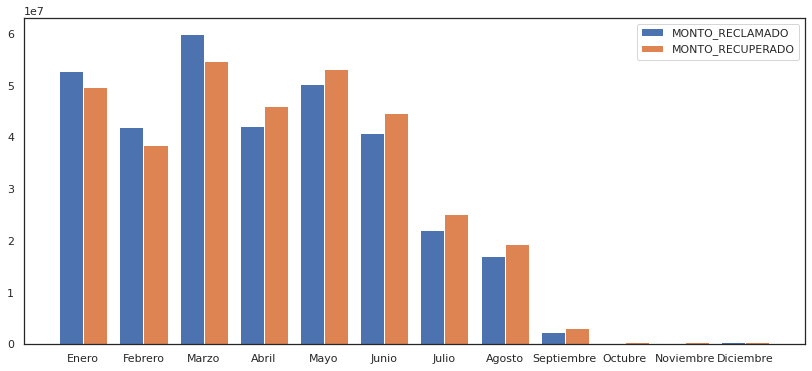

In [ ]:
plt.figure(figsize=(14, 6))
n = len(agrupado_monto.index)
x = np.arange(n)
width = 0.4
plt.bar(x - width/2, agrupado_monto.MONTO_RECLAMADO, width=width, label='MONTO_RECLAMADO')
plt.bar(x + width/2, agrupado_monto.MONTO_RECUPERADO, width=width, label='MONTO_RECUPERADO')
plt.xticks(x, agrupado_monto.index)
plt.legend(loc='best')
plt.show()

In [117]:
import folium

In [118]:
estados_mx_json = 'https://raw.githubusercontent.com/atorresf/datasets/main/estados_mx.json'
mapa_mx = folium.Map(location = [25,-102],
                    zoom_start=5,
                    width="60%",
                    height = "70%",
                    )

In [119]:
# agrupa las denuncias por entidad federativa
edos = df.groupby(['ESTADO']).count()
edos['estado'] = edos.index
estados_mx = edos[['estado','ESTADO_PROCESAL']]

In [120]:
folium.Choropleth(
    geo_data = estados_mx_json,
    name = 'Quejas por estado',
    data = estados_mx,
    columns = ['estado','ESTADO_PROCESAL'],
    key_on = "feature.properties.name", #mio
    fill_color = 'Blues',
    fill_opacity= 0.7,
    line_opacity=0.5,
    legend_name = "Quejas"
).add_to(mapa_mx)

folium.LayerControl().add_to(mapa_mx)

mapa_mx


# **7. Pruebas A/B y Procesamiento de Lenguaje Natural** (Postwork 7)
**DESARROLLO**

En esta sesión aprendimos dos cosas: Pruebas A/B y Procesamiento de Lenguaje Natural. No podemos practicar Pruebas A/B en nuestro proyecto, porque en realidad los proyectos que estamos realizando no se prestan a esto.

Por lo pronto en este Postwork vamos a practicar las técnicas de Procesamiento de Lenguaje Natural que hemos aprendido y realiza los siguientes ejercicios. Si tu dataset contiene datos no estructurados, entonces éste es el momento de agregar PLN a tu proyecto.

Realiza los siguientes procedimientos en caso de que apliquen a tu dataset:

1. Utiliza patrones Regex para limpiar tus datos estructurados
2. Dado que debes de conocer bien tu dataset (excepto si es un nuevo dataset que buscaste para este Postwork), es probable que tengas una idea de las palabras que son relevantes para tu tema. Genera un objeto Text con la librería nltk y explora los contextos de las palabras que elegiste. Utiliza el método similar para obtener palabras que tengan contextos similares a las palabras originales. Puede que descubras nuevas palabras que tengan relevancia para tu proyecto.
3. Utiliza el objeto FreqDist de nltk para hacer análisis estadístico de tu dataset. Explora las palabras y los bigramas más comunes de tu dataset.
4. Realiza visualizaciones de tus conteos de frecuencias utilizando gráficas de barras.
5. Realiza visualizaciones de las distribuciones de frecuencias de las longitudes de las palabras o de las oraciones.
6. Realiza nubes de palabras para detectar los temas más importantes de tu conjunto de datos.
7. Haz un análisis de sentimientos de tu conjunto de datos, de preferencia utilizando una variable categórica para segmentar tus datos y poder comparar las distribuciones de polaridades entre cada segmento.

In [ ]:
grouped_by_nombre_comercial = df.groupby('NOMBRE_COMERCIAL')['MOTIVO_RECLAMACION'].max()
grouped_by_nombre_comercial

NOMBRE_COMERCIAL
\tEUROWELDING MEXICO, SA DE CV                                          Defectos de fabricación
\tUNIVERSIDAD DEL NUEVO MEXICO, SC                Negativa a la entrega del producto o servicio
"SUEÑO MAGICO" SALON PARA EVENTOS SOCIALES                       Negativa a cambio o devolución
& HOME DESARROLLOS DEL CENTRO, SA DE CV       Incumplimiento de plazos para la entrega del p...
0                                                          Negativa a la rescisión del contrato
                                                                    ...                        
ZULEMA DE JESUS CHAPARRO                                  Negativa a hacer efectiva la garantía
ZULMA SOCORRO MORENO ESTRADA                                     Negativa a cambio o devolución
ZURRICA DESIGN CO, SA DE CV                                Negativa a la devolución de depósito
ZUZET GUADALUPE PEREZ SANCHEZ                              Negativa a la devolución de depósito
ramm ELECTRONICA DIGITA

In [ ]:
grouped_by_nombre_comercial[grouped_by_nombre_comercial.str.contains('defecto | devolución ', case=False)]

NOMBRE_COMERCIAL
20TREE, SAPI                      Negativa a la devolución de depósito
A&B STAR, SA DE CV                Negativa a la devolución de depósito
AARON CONTRERAS SOLIS             Negativa a la devolución de depósito
ABARROTES LA SOLEDAD, SA DE CV    Negativa a la devolución de depósito
ABCEL MOVILES                     Negativa a la devolución de depósito
                                                  ...                 
ZEUS MUÑOZ                        Negativa a la devolución de depósito
ZOILA YANETH DE LA RIVA REYES     Negativa a la devolución de depósito
ZONA TRAVEL, SAS DE CV            Negativa a la devolución de depósito
ZURRICA DESIGN CO, SA DE CV       Negativa a la devolución de depósito
ZUZET GUADALUPE PEREZ SANCHEZ     Negativa a la devolución de depósito
Name: MOTIVO_RECLAMACION, Length: 2598, dtype: object

In [ ]:
grouped_by_nombre_comercial[grouped_by_nombre_comercial.str.contains('engañosa', case=False)]

NOMBRE_COMERCIAL
ABARROTERA EL DUERO, SA DE CV                     publicidad engañosa
APARATOLOGIA ESTETICA ALOE                        publicidad engañosa
ARELY MELENDEZ                                    publicidad engañosa
AUTO MOTORES DE SAN ANGEL, SA DE CV               publicidad engañosa
AUTOMOTORES BALTICOS DE HERMOSILLO, SA DE CV      publicidad engañosa
                                                         ...         
VACACIONES PREMIER SUNNY DAYS TRAVEL, SA DE CV    publicidad engañosa
VIAJEROS-SOMOS COM, SA DE CV                      publicidad engañosa
VILLA INDEPENDENCIA                               publicidad engañosa
VISUAL EXPRESS MEXICO, SA DE CV                   publicidad engañosa
YAFAH EXPRESS                                     publicidad engañosa
Name: MOTIVO_RECLAMACION, Length: 88, dtype: object

In [ ]:
import nltk

In [ ]:
#limpiar el dataFrame
grouped_by_nombre_comercial = grouped_by_nombre_comercial.str.lower()
grouped_by_nombre_comercial = grouped_by_nombre_comercial.str.strip()
grouped_by_nombre_comercial = grouped_by_nombre_comercial.str.replace('[^\w\s]', '')
grouped_by_nombre_comercial = grouped_by_nombre_comercial.str.replace('\d', '')
grouped_by_nombre_comercial = grouped_by_nombre_comercial.str.replace('\\n', '')
grouped_by_nombre_comercial = grouped_by_nombre_comercial.str.replace('\t', '')
grouped_by_nombre_comercial = grouped_by_nombre_comercial.dropna()

grouped_by_nombre_comercial

NOMBRE_COMERCIAL
\tEUROWELDING MEXICO, SA DE CV                                          defectos de fabricación
\tUNIVERSIDAD DEL NUEVO MEXICO, SC                negativa a la entrega del producto o servicio
"SUEÑO MAGICO" SALON PARA EVENTOS SOCIALES                       negativa a cambio o devolución
& HOME DESARROLLOS DEL CENTRO, SA DE CV       incumplimiento de plazos para la entrega del p...
0                                                          negativa a la rescisión del contrato
                                                                    ...                        
ZULEMA DE JESUS CHAPARRO                                  negativa a hacer efectiva la garantía
ZULMA SOCORRO MORENO ESTRADA                                     negativa a cambio o devolución
ZURRICA DESIGN CO, SA DE CV                                negativa a la devolución de depósito
ZUZET GUADALUPE PEREZ SANCHEZ                              negativa a la devolución de depósito
ramm ELECTRONICA DIGITA

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
tokenized = grouped_by_nombre_comercial.apply(nltk.word_tokenize)

In [ ]:
tokenized

NOMBRE_COMERCIAL
\tEUROWELDING MEXICO, SA DE CV                                      [defectos, de, fabricación]
\tUNIVERSIDAD DEL NUEVO MEXICO, SC            [negativa, a, la, entrega, del, producto, o, s...
"SUEÑO MAGICO" SALON PARA EVENTOS SOCIALES                 [negativa, a, cambio, o, devolución]
& HOME DESARROLLOS DEL CENTRO, SA DE CV       [incumplimiento, de, plazos, para, la, entrega...
0                                                   [negativa, a, la, rescisión, del, contrato]
                                                                    ...                        
ZULEMA DE JESUS CHAPARRO                           [negativa, a, hacer, efectiva, la, garantía]
ZULMA SOCORRO MORENO ESTRADA                               [negativa, a, cambio, o, devolución]
ZURRICA DESIGN CO, SA DE CV                         [negativa, a, la, devolución, de, depósito]
ZUZET GUADALUPE PEREZ SANCHEZ                       [negativa, a, la, devolución, de, depósito]
ramm ELECTRONICA DIGITA

In [ ]:
all_words = tokenized.sum()
text = nltk.Text(all_words)

text

<Text: defectos de fabricación negativa a la entrega del...>

In [ ]:
text.concordance('devolución', lines=20)

Displaying 20 of 5342 matches:
to o servicio negativa a cambio o devolución incumplimiento de plazos para la 
ega del prod o serv negativa a la devolución de depósito negativa a hacer efec
os anunciados negativa a cambio o devolución defectos de fabricación negativa 
fectiva la garantía negativa a la devolución de depósito negativa a la entrega
a la garantía negativa a cambio o devolución negativa a la devolución de depós
cambio o devolución negativa a la devolución de depósito negativa a hacer efec
a la garantía negativa a cambio o devolución deficiencia en la reparación nega
ega del prod o serv negativa a la devolución de depósito negativa a cambio o d
n de depósito negativa a cambio o devolución negativa a cambio o devolución ne
 o devolución negativa a cambio o devolución negativa a la entrega del product
 dependientes negativa a cambio o devolución negativa a hacer efectiva la gara
tes precio o tarifa negativa a la devolución de depósito negativa a la entrega
cisión del contrato n

In [ ]:
text.similar('publicidad')

In [ ]:
# Total de palabras

len(text)

134623

In [ ]:
# Total de palabras distintas

len(set(text))

188

In [ ]:
# Cuantificando la riqueza léxica

len(set(text)) / len(text)

0.001396492426999844

In [ ]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
text.collocations()

entrega del; del producto; hacer efectiva; plazos para; servicio
negativa; del prod; garantía negativa; depósito negativa; corregir
errores; del contrato; rescisión del; servicio equivocado; devolución
negativa; serv negativa; pago por; reparación negativa; sus
dependientes; contrato negativa; acuerdo previo; respetó acuerdo


In [ ]:
# Utilizamos FreqDist para analizar la distribución de frecuencia de nuestras palabras

freq_dist = nltk.FreqDist(all_words)

print(freq_dist)

<FreqDist with 188 samples and 134623 outcomes>


In [ ]:
freq_dist.most_common(20)

[('a', 16195),
 ('negativa', 16113),
 ('la', 15008),
 ('o', 11260),
 ('del', 8825),
 ('entrega', 7365),
 ('producto', 7143),
 ('servicio', 6838),
 ('de', 5424),
 ('devolución', 5342),
 ('garantía', 3009),
 ('efectiva', 3003),
 ('hacer', 2995),
 ('cambio', 2825),
 ('depósito', 2587),
 ('plazos', 1311),
 ('incumplimiento', 1286),
 ('para', 1286),
 ('prod', 1285),
 ('serv', 1285)]

In [ ]:
from nltk.corpus import stopwords
import altair as alt

In [ ]:
spanish_stop_words = stopwords.words('spanish')

all_words_except_stop_words = [word for word in all_words if word not in spanish_stop_words]

freq_dist_no_stop_words = nltk.FreqDist(all_words_except_stop_words)

In [ ]:
most_common_30 = pd.DataFrame(freq_dist_no_stop_words.most_common(30))
most_common_30.columns = ["word","freq"]


In [ ]:
# Grafica de barras (Usando Altair)
alt.Chart(data = most_common_30).mark_bar()\
.encode(
    y = alt.Y(shorthand="word:N", title=None, sort='-x'),
    x = alt.X(shorthand = "freq:Q", title=None),
    tooltip = [alt.Tooltip(title="Frecuencia", shorthand="freq")])\
.properties(title = "Frecuencia de palabras")\
.configure_axis(domain = False, ticks = False)\
.configure_axisY(labelFontWeight = 600)\
.configure_view(strokeWidth = 0)\
.configure_title(anchor = "start", fontSize = 20)

alt.Chart(...)

In [ ]:
type(most_common_30)

numpy.ndarray

In [ ]:
freq_dist_bigrams = nltk.FreqDist(list(nltk.bigrams(all_words_except_stop_words)))
df_20mostcommon_bigrams = pd.DataFrame(freq_dist_bigrams.most_common(20))
df_20mostcommon_bigrams.columns = ["bigram","freq"]
df_20mostcommon_bigrams["bigram"] = df_20mostcommon_bigrams["bigram"]\
                                    .apply(lambda x: ' '.join(map(str, x)))

In [ ]:
# Grafica de barras (Usando Altair)
alt.Chart(data = df_20mostcommon_bigrams).mark_bar()\
.encode(
    y = alt.Y(shorthand="bigram:N", title=None, sort='-x'),
    x = alt.X(shorthand = "freq:Q", title=None),
    tooltip = [alt.Tooltip(title="Frecuencia", shorthand="freq")])\
.properties(title = "Frecuencia de bigramas")\
.configure_axis(domain = False, ticks = False)\
.configure_axisY(labelFontWeight = 600)\
.configure_view(strokeWidth = 0)\
.configure_title(anchor = "start", fontSize = 20)

alt.Chart(...)

In [ ]:
# Conteo de una palabra y porcentaje de aparición

print(f'{(100 * freq_dist_no_stop_words["engañosa"] / len(all_words_except_stop_words)):.3f}%')

0.119%


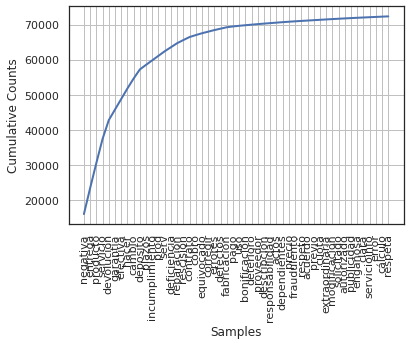

In [ ]:
# Veamos qué proporción del text está siendo ocupada por las 50 palabras más comunes

freq_dist_no_stop_words.plot(50, cumulative=True);

In [ ]:
# Palabras que sólo aparecen una sola vez

freq_dist_no_stop_words.hapaxes()[:20]

['comprobantesinforma',
 'medio',
 'itinerario',
 'daño',
 'extravio',
 'idiomas',
 'bonificaciones',
 'problemas',
 'acreditar',
 'compra',
 'autorizaciones',
 'licencias',
 'proveer',
 'pagoinforma',
 'contenido',
 'productos',
 'envasados',
 'penalizacionesinforma',
 'garantíainfo',
 'inf']

In [ ]:
# Palabras largas

unique = set(all_words_except_stop_words)
unique_series = pd.Series(list(unique))

unique_series

0      bonificación
1               neg
2       deficiencia
3      instrumentos
4            bienes
           ...     
162         entregó
163       provisión
164      devolución
165        abusivas
166       productos
Length: 167, dtype: object

In [ ]:
unique_series[unique_series.str.len() > 15]

39          condicionamiento
49     penalizacionesinforma
55          discriminatorias
82       comprobantesinforma
93          devolucionesinfo
137        seguridadausentes
161         comercialización
dtype: object

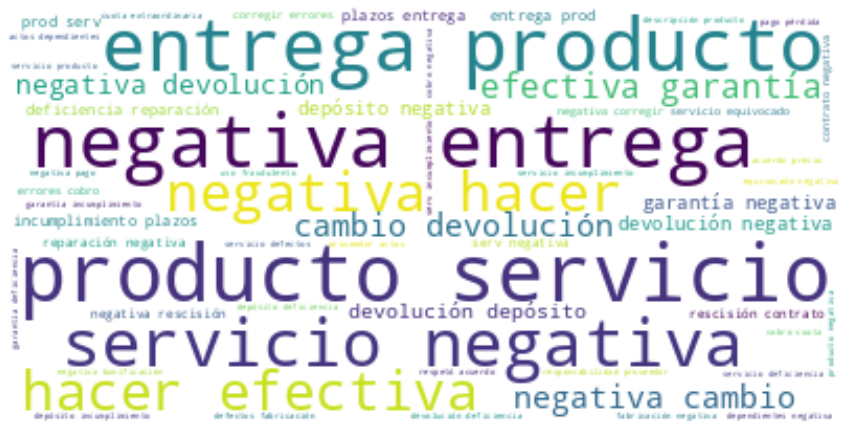

In [ ]:
# 10. Genera una nube de palabras con tu dataset.
from wordcloud import WordCloud

wordcloud = WordCloud(max_font_size=100, background_color="white").generate(' '.join(all_words_except_stop_words))

plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# **Introducción a Machine Learning: Clasificación No Supervisada y Supervisada** (Postwork 8)
**DESARROLLO**

¡Bienvenid@ a tu último Postwork! En este Postwork haremos dos cosas: practicar la aplicación del algoritmo de Regresión Logística y resolver dudas generales sobre tu proyecto. Realiza los siguientes pasos:

1. Si hay un problema de clasificación binaria en tu proyecto, ¡genial! Aplica lo aprendido en esta sesión y entrena un modelo de Regresión Logística con tu dataset.
2. Si no hay un problema de clasificación binaria en tu proyecto, pídele ayuda a la experta para conseguir un dataset con el que puedas practicar.
3. Evalúa tu modelo de Regresión Logística utilizando matriz de confusión; medidas de precisión, exactitud, sensibilidad y especificidad; y curva ROC / AUC.

In [ ]:
#crosstab = pd.crosstab(df['ESTADO'], df['ESTADO_PROCESAL'])
#crosstab.loc['CIUDAD DE MÉXICO']
df.groupby(['ESTADO_PROCESAL']).count().reset_index()


,ESTADO_PROCESAL,FECHA_INGRESO,FECHA_CIERRE,TIPO_CONCILIACION,PROVEEDOR,NOMBRE_COMERCIAL,GIRO,SECTOR,ESTADO,TIPO_RECLAMACION,...,MONTO_RECUPERADO,PROCEDIMIENTO,BIEN_O_SERVICIO,MEDIO_INGRESO,TIPO_PRODUCTO,MODALIDAD_COMPRA,MODALIDAD_PAGO,PROBLEMA_ESPECIAL,MES_NUM,MES
0,Conciliada,24811,24790,24811,24811,24811,24811,24811,24811,24811,...,24811,24811,24811,24811,24811,24811,24811,24811,24811,24811
1,Desistimiento,15911,15901,15911,15911,15911,15911,15911,15911,15911,...,15911,15911,15911,15911,15911,15911,15911,15911,15911,15911
2,En Trámite,34937,127,34937,34937,34937,34937,34937,34937,34937,...,34937,34937,34937,34937,34937,34937,34937,34937,34937,34937
3,Improcedente,426,426,426,426,426,426,426,426,426,...,426,426,426,426,426,426,426,426,426,426
4,No Conciliada,6695,6205,6695,6695,6695,6695,6695,6695,6695,...,6695,6695,6695,6695,6695,6695,6695,6695,6695,6695
5,Turnada a Concil Medios Elec.,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
6,Turnada a Concil Person p/seg,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [ ]:
df_regresion = df.query("ESTADO_PROCESAL in ('Conciliada', 'Desistimiento','Improcedente','No Conciliada')")
#1 conciliada 0 No conciliada
df_regresion['ESTADO_PROCESAL'] = df_regresion['ESTADO_PROCESAL'].apply(lambda x: 1 if x == 'Conciliada' else 0)
df_regresion = df_regresion[['ESTADO_PROCESAL','COSTO_BIEN_SERVICIO','MONTO_RECLAMADO','MONTO_RECUPERADO']]

In [ ]:
df_regresion.isna().sum()

ESTADO_PROCESAL        0
COSTO_BIEN_SERVICIO    3
MONTO_RECLAMADO        0
MONTO_RECUPERADO       0
dtype: int64

In [ ]:
df_regresion['COSTO_BIEN_SERVICIO'] = df_regresion['COSTO_BIEN_SERVICIO'].fillna(value=0)

In [ ]:
df_regresion.isna().sum()

ESTADO_PROCESAL        0
COSTO_BIEN_SERVICIO    0
MONTO_RECLAMADO        0
MONTO_RECUPERADO       0
dtype: int64

Se intentará entrenar un modelo de regresión Logística para clasificar el status de la queja si se conciliará o no

In [ ]:
X = df_regresion.drop(columns=['ESTADO_PROCESAL'])
y = df_regresion['ESTADO_PROCESAL']

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
logreg = LogisticRegression(max_iter=10000)

In [ ]:
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [ ]:
y_pred = logreg.predict(X_test)

y_pred

array([0, 0, 0, ..., 0, 1, 0])

In [ ]:
logreg.score(X_test, y_test)

0.7787222183515642

De acuerdo al valor obtenido viendo que está cercano a 1 podemos decir que el modelo es bueno pero no predice de forma correcta.

In [ ]:
from sklearn import metrics

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

cnf_matrix

array([[6824,    9],
       [3167, 4353]])

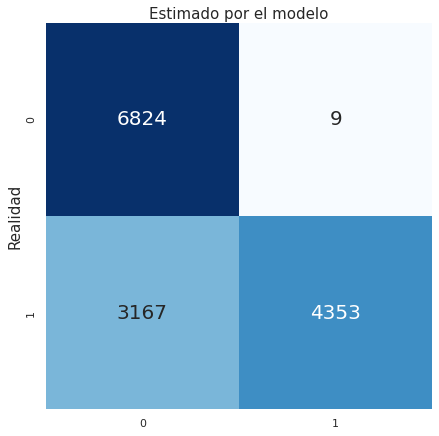

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots(figsize=(6, 6))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Blues" ,fmt='g', cbar=False, annot_kws={"size": 20})
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.ylabel('Realidad', fontsize=15, y=0.5)
plt.xlabel('Estimado por el modelo', fontsize=15);

In [ ]:
tn, fp, fn, tp = cnf_matrix.ravel()

print("Precision:",round(metrics.precision_score(y_test, y_pred)*100,2),"% de las clasificaciones positivas son correctas")
print("Exactitud:",round(metrics.accuracy_score(y_test, y_pred)*100,2),"% de las clasificaciones son correctas y un ",round(100-(metrics.accuracy_score(y_test, y_pred)*100),2),"% se clasificaron incorrectamente")
print("Sensibilidad:",round(metrics.recall_score(y_test, y_pred)*100,2),"% de las clasificaciones positivas reales fueron correctas y un ", round(100-(metrics.recall_score(y_test, y_pred)*100),2),"% se clasificaron incorrectamente")
print("Especificidad:", round(tn / (tn + fp)*100,2),"% de las clasificaciones negativas reales fueron correctas y un ", round(100-(tn / (tn + fp)*100),2),"% se clasificaron incorrectamente")

Precision: 99.79 % de las clasificaciones positivas son correctas
Exactitud: 77.87 % de las clasificaciones son correctas y un  22.13 % se clasificaron incorrectamente
Sensibilidad: 57.89 % de las clasificaciones positivas reales fueron correctas y un  42.11 % se clasificaron incorrectamente
Especificidad: 99.87 % de las clasificaciones negativas reales fueron correctas y un  0.13 % se clasificaron incorrectamente


Podemos concluir que el modelo no es tan bueno ya que clasifica incorrectamente

In [ ]:
y_pred_proba = logreg.predict_proba(X_test)

y_pred_proba[:10,:]

array([[0.50041444, 0.49958556],
       [0.50271371, 0.49728629],
       [0.50000004, 0.49999996],
       [0.50225475, 0.49774525],
       [0.01026647, 0.98973353],
       [0.50329789, 0.49670211],
       [0.50000004, 0.49999996],
       [0.50022679, 0.49977321],
       [0.50011355, 0.49988645],
       [0.50007092, 0.49992908]])

In [ ]:
from sklearn.metrics import roc_curve, auc

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
roc_auc = auc(fpr, tpr)

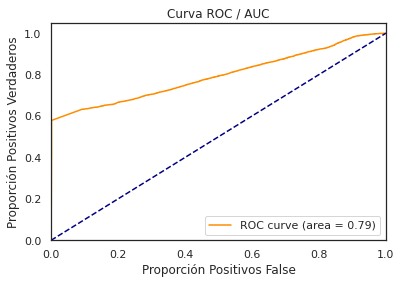

In [ ]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Proporción Positivos False')
plt.ylabel('Proporción Positivos Verdaderos')
plt.title('Curva ROC / AUC')
plt.legend(loc="lower right")
plt.show()

Nuestro Valor está cercano a 0.8 por lo que concluimos que el modelo no es tan bueno en la clasificación, no hace muy buena distinción entre positivos y negativos.